<a href="https://colab.research.google.com/github/pinilDissanayaka/Telecom-Customer-Churn-prediction/blob/main/Scripts/%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [693]:
pip install Catboost

In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as lab
import os
from scipy import stats


from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [271]:
FIGPATH = '/content/Figures'
os.mkdir(FIGPATH)

FileExistsError: [Errno 17] File exists: '/content/Figures'

# **UNDERSTAND ABOUT DATA**


In [501]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [502]:
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [503]:
df.shape

(7043, 21)

This dataset contain 7043 rows and 21 columns.


In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [505]:
allColumns = df.columns
catColumns = df.select_dtypes(include=['object']).columns
numColumns = list(set(allColumns) - set(catColumns))



print(f"All columns : {list(allColumns)} \n")
print(f"Categorical columns :  {list(catColumns)} \n")
print(f"Numeric columns : {list(numColumns)} \n")

All columns : ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] 

Categorical columns :  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'] 

Numeric columns : ['tenure', 'MonthlyCharges', 'SeniorCitizen'] 



**About dataset**
* CustomerId: Customer ID
* Gender: Gender
* SeniorCitizen: Whether the customer is a senior citizen (1, 0)
* Partner: Whether the client has a partner (Yes, No) - Indicates if the customer is married or not
* Dependents: Whether the client has dependents (Yes, No) - Indicates if the customer has children, parents, grandparents, etc.
* Tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has phone service (Yes, No)
* MultipleLines: Whether the customer has more than one line (Yes, No, No phone service)
* InternetService: Customer's internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security (Yes, No, No Internet service)
* OnlineBackup: Whether the customer has online backup (Yes, No, No Internet service)
* DeviceProtection: Whether the customer has device protection (Yes, No, No Internet service)
* TechSupport: Whether the customer receives technical support (Yes, No, No Internet service)
* StreamingTV: Indicates whether the customer has streaming TV (Yes, No, No Internet service) Indicates if the customer uses the Internet service to stream television programs from a third-party provider
* StreamingMovies: Whether the customer has streaming movies (Yes, No, No Internet service) - Indicates if the customer uses the Internet service to stream movies from a third-party provider
* Contract: Duration of the customer's contract (Month to month, One year, Two years)
* PaperlessBilling: Whether the customer receives a paperless bill (Yes, No)
* PaymentMethod: Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: Amount charged to the customer monthly
* TotalCharges: Total amount charged to the customer
* Churn: Whether the customer is using the service or not (Yes or No) - Refers to customers who left in the last month or quarter

In [506]:
df.duplicated().sum()

0

This dataset doesn't contain duplicate values.


In [507]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

This dataset doesn't contain any NA values.



In [508]:
print("Statistical summary of the DataFrame:")
df.describe().T

Statistical summary of the DataFrame:


count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [509]:
df.drop(columns=["customerID"], inplace =True)

In [510]:
allColumns = df.columns
catColumns = df.select_dtypes(include=['object']).columns
numColumns = list(set(allColumns) - set(catColumns))



print(f"All columns : {list(allColumns)} \n")
print(f"Categorical columns :  {list(catColumns)} \n")
print(f"Numeric columns : {list(numColumns)} \n")

All columns : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] 

Categorical columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'] 

Numeric columns : ['tenure', 'MonthlyCharges', 'SeniorCitizen'] 



In [511]:
for column in allColumns:
  print(f"\n{column} column contain :\n")
  print(f"data type of {column} : {df[column].dtype}")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


gender column contain :

data type of gender : object
['Female' 'Male']

Male      3555
Female    3488
Name: gender, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

SeniorCitizen column contain :

data type of SeniorCitizen : int64
[0 1]

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Partner column contain :

data type of Partner : object
['Yes' 'No']

No     3641
Yes    3402
Name: Partner, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Dependents column contain :

data type of Dependents : object
['No' 'Yes']

No     4933
Yes    2110
Name: Dependents, dty

In [512]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0 : 'No', 1 : 'Yes'})

In [513]:
for column in allColumns:
  print(f"\n{column} column contain :\n")
  print(f"data type of {column} : {df[column].dtype}")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")


gender column contain :

data type of gender : object
['Female' 'Male']

Male      3555
Female    3488
Name: gender, dtype: int64


SeniorCitizen column contain :

data type of SeniorCitizen : object
['No' 'Yes']

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64


Partner column contain :

data type of Partner : object
['Yes' 'No']

No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents column contain :

data type of Dependents : object
['No' 'Yes']

No     4933
Yes    2110
Name: Dependents, dtype: int64


tenure column contain :

data type of tenure : int64
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


PhoneService column contain :

data typ

TotalCharges column has some ' ' values. Let make them as a NA values and convert it as a numeric column.

In [514]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [515]:
for column in allColumns:
  print(f"\n{column} column contain :\n")
  print(f"data type of {column} : {df[column].dtype}")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


gender column contain :

data type of gender : object
['Female' 'Male']

Male      3555
Female    3488
Name: gender, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

SeniorCitizen column contain :

data type of SeniorCitizen : object
['No' 'Yes']

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Partner column contain :

data type of Partner : object
['Yes' 'No']

No     3641
Yes    3402
Name: Partner, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Dependents column contain :

data type of Dependents : object
['No' 'Yes']

No     4933
Yes    2110
Name: Dep

In [516]:
allColumns = df.columns
catColumns = df.select_dtypes(include=['object']).columns
numColumns = list(set(allColumns) - set(catColumns))



print(f"All columns : {list(allColumns)} \n")
print(f"Categorical columns :  {list(catColumns)} \n")
print(f"Numeric columns : {list(numColumns)} \n")

All columns : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] 

Categorical columns :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 

Numeric columns : ['tenure', 'MonthlyCharges', 'TotalCharges'] 



In [517]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now TotalCharges column has 11 null values.

In [518]:
print(f"It is a {df['TotalCharges'].isnull().sum() / df.shape[0] * 100} % from the distribution.")

It is a 0.1561834445548772 % from the distribution.


In [519]:
df[df['TotalCharges'].isnull()]

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female            No     Yes        Yes       0           No   
753     Male            No      No        Yes       0          Yes   
936   Female            No     Yes        Yes       0          Yes   
1082    Male            No     Yes        Yes       0          Yes   
1340  Female            No     Yes        Yes       0           No   
3331    Male            No     Yes        Yes       0          Yes   
3826    Male            No     Yes        Yes       0          Yes   
4380  Female            No     Yes        Yes       0          Yes   
5218    Male            No     Yes        Yes       0          Yes   
6670  Female            No     Yes        Yes       0          Yes   
6754    Male            No      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           NaN    No  


In [520]:
df[df['tenure'] <= 0]

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female            No     Yes        Yes       0           No   
753     Male            No      No        Yes       0          Yes   
936   Female            No     Yes        Yes       0          Yes   
1082    Male            No     Yes        Yes       0          Yes   
1340  Female            No     Yes        Yes       0           No   
3331    Male            No     Yes        Yes       0          Yes   
3826    Male            No     Yes        Yes       0          Yes   
4380  Female            No     Yes        Yes       0          Yes   
5218    Male            No     Yes        Yes       0          Yes   
6670  Female            No     Yes        Yes       0          Yes   
6754    Male            No      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           NaN    No  


In [521]:
df[df["TotalCharges"].isnull()]["MonthlyCharges"]

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64

In [522]:
df[df["TotalCharges"].isnull()]["tenure"]

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

Dataset where the information on the "TotalCharges" of customers who have stayed with the company for less than one month is missing. In such cases, we can use the data from their "MonthlyCharges" column to impute or estimate the missing values for "TotalCharges.

And increace every customer tenure by 1.

In [523]:
df['TotalCharges'].fillna(value=df[df["TotalCharges"].isnull()]["MonthlyCharges"], inplace =True)

df['tenure'] = df['tenure'] + 1

In [524]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [525]:
for column in allColumns:
  print(f"\n{column} column contain :\n")
  print(f"data type of {column} : {df[column].dtype}")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


gender column contain :

data type of gender : object
['Female' 'Male']

Male      3555
Female    3488
Name: gender, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

SeniorCitizen column contain :

data type of SeniorCitizen : object
['No' 'Yes']

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Partner column contain :

data type of Partner : object
['Yes' 'No']

No     3641
Yes    3402
Name: Partner, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Dependents column contain :

data type of Dependents : object
['No' 'Yes']

No     4933
Yes    2110
Name: Dep

In [527]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6534
Churn                  2
dtype: int64

# **CATEGORICAL VARIABLES ANALYSIS**

In [528]:
print(f"Categorical columns :  {list(catColumns)} \n")

Categorical columns :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 



In [529]:
df[catColumns].nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

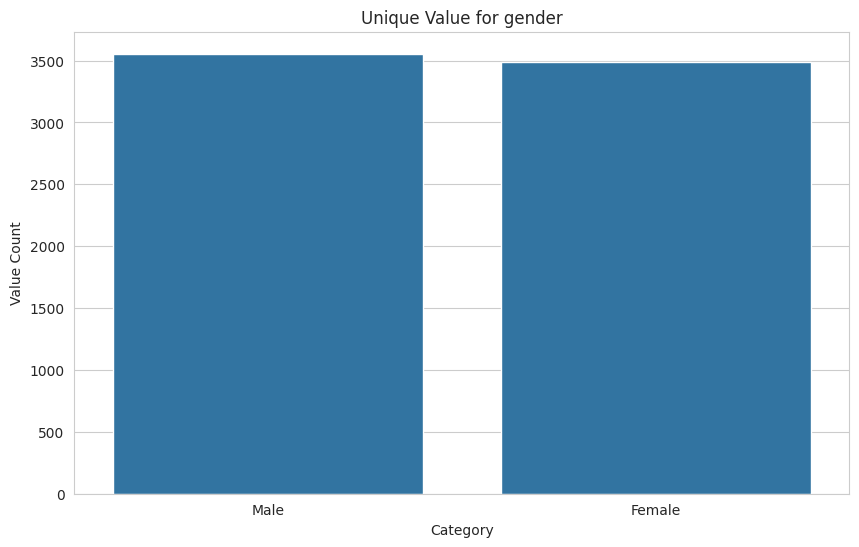

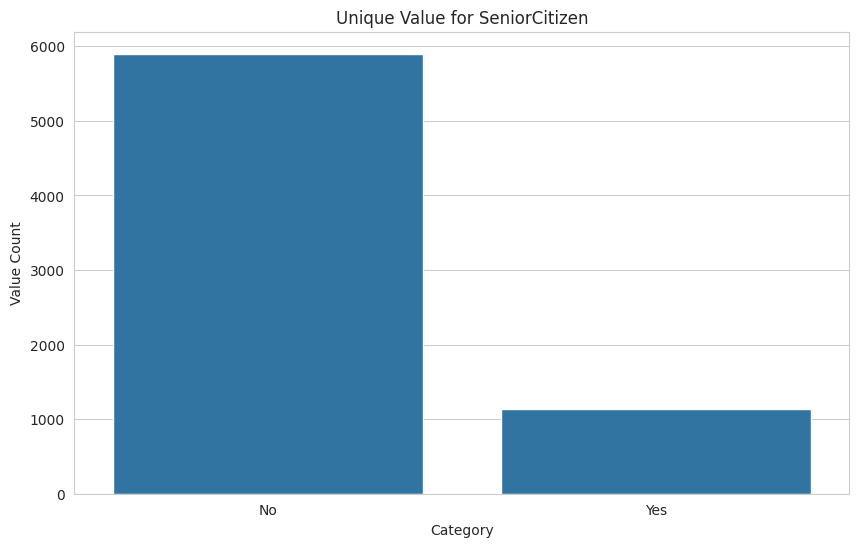

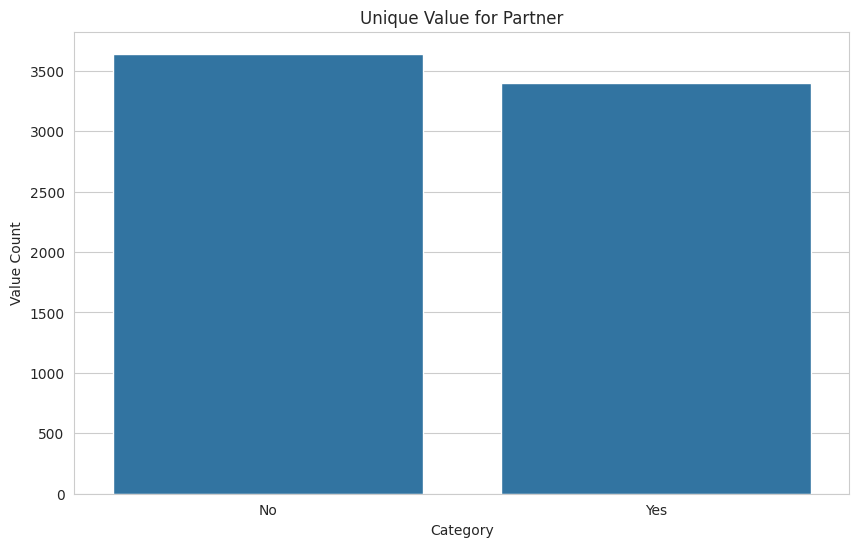

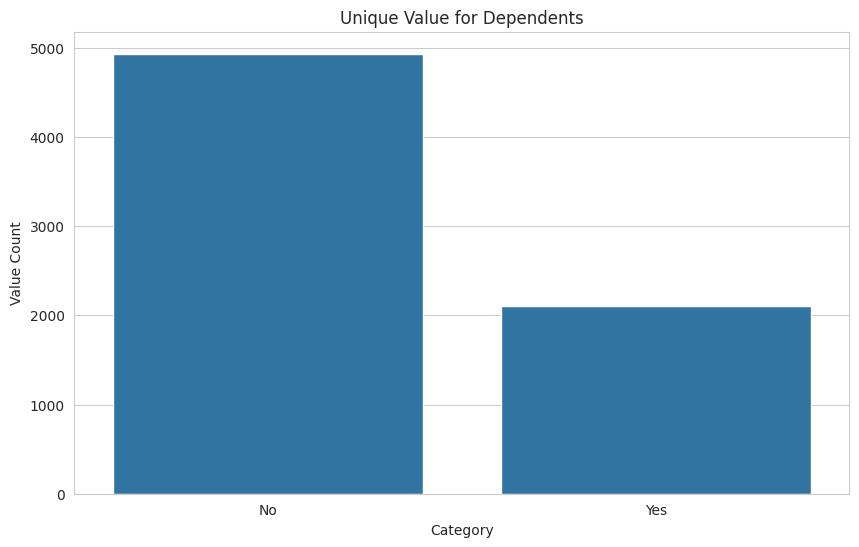

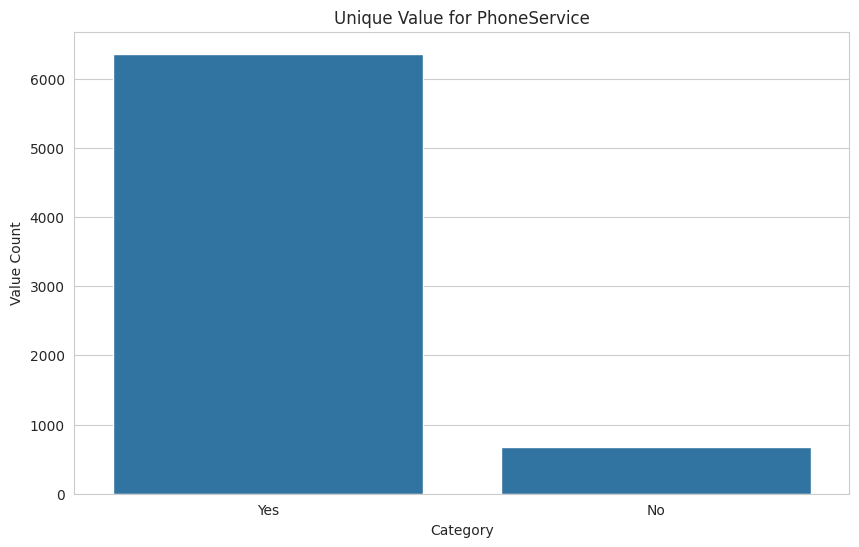

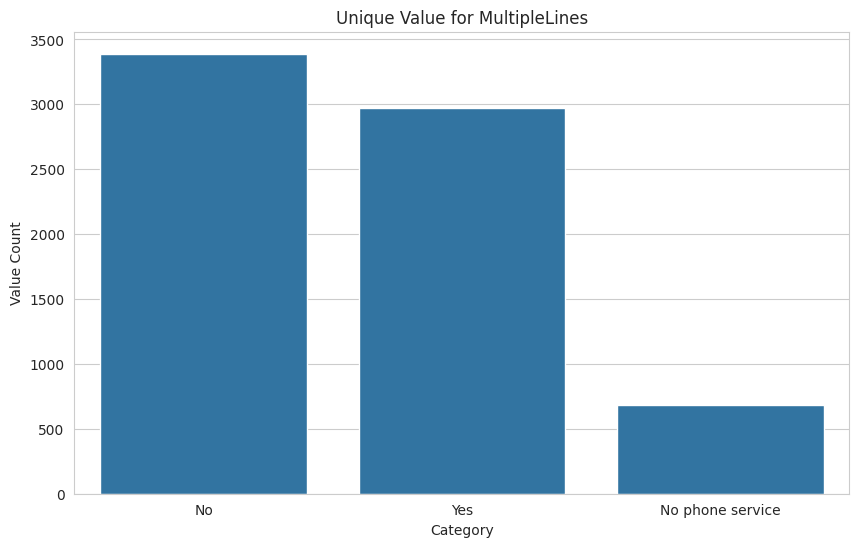

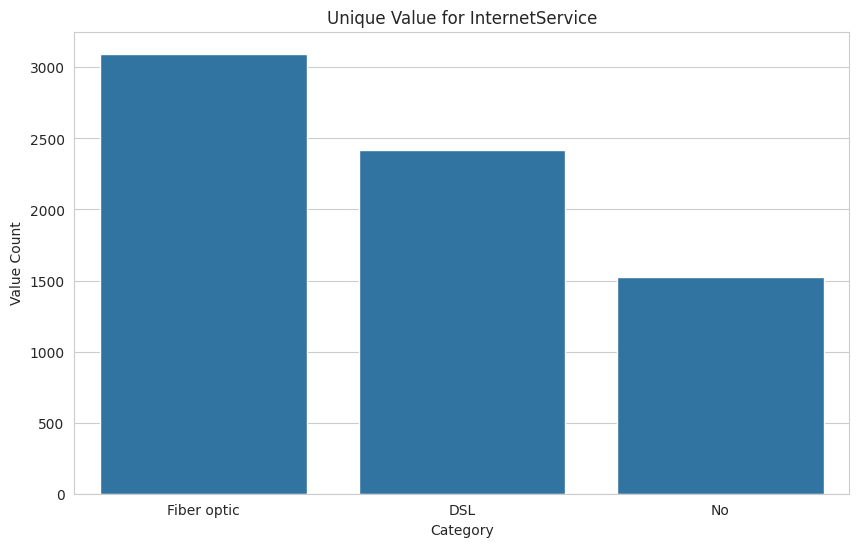

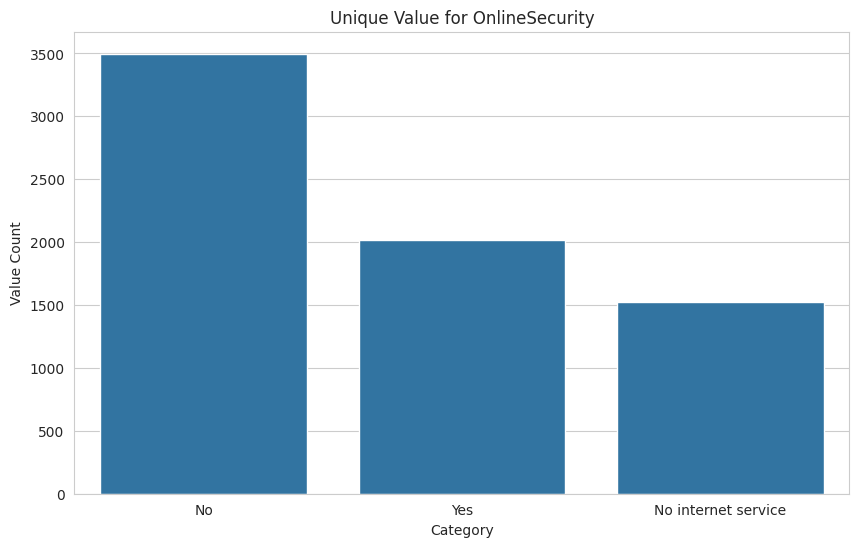

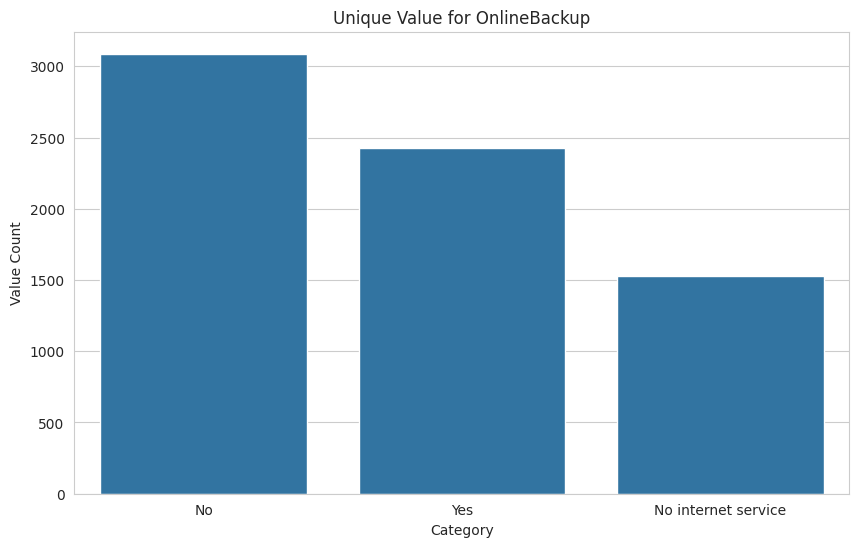

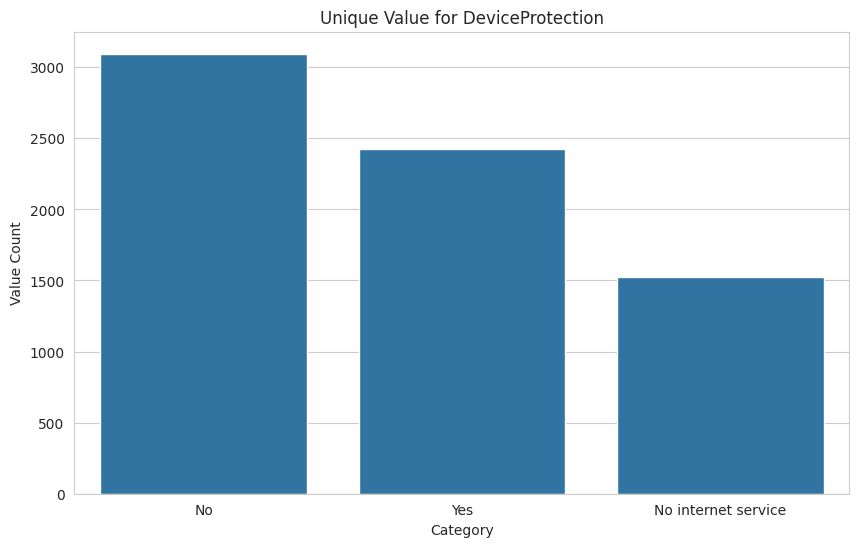

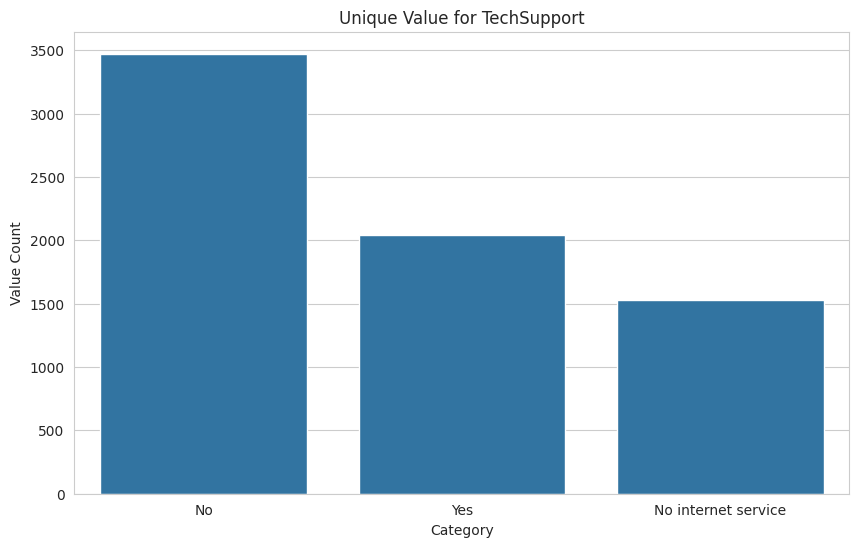

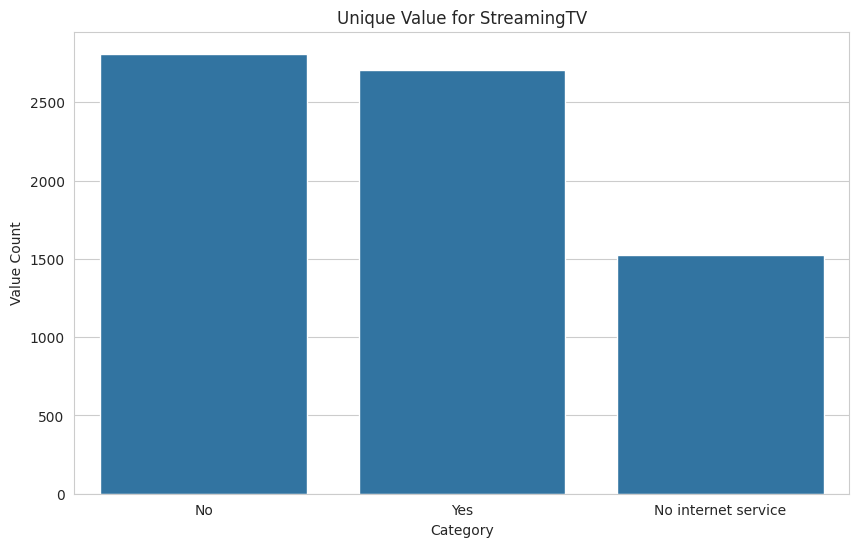

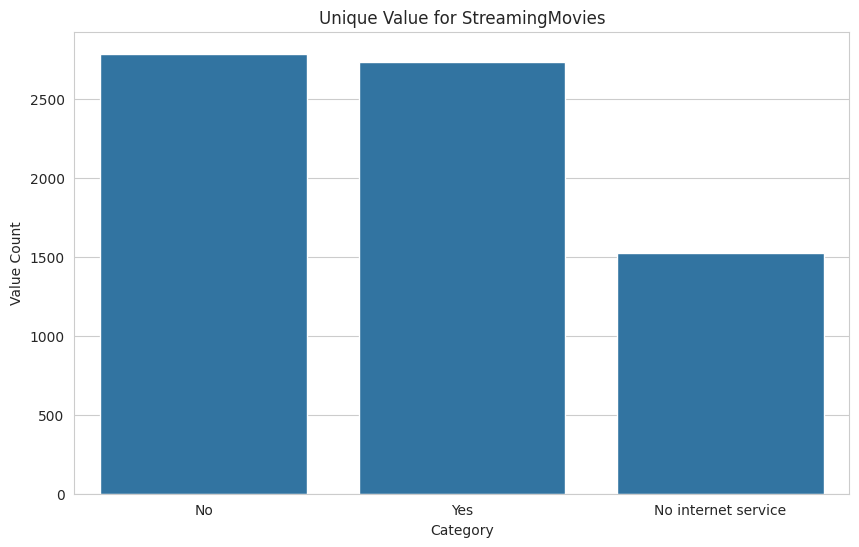

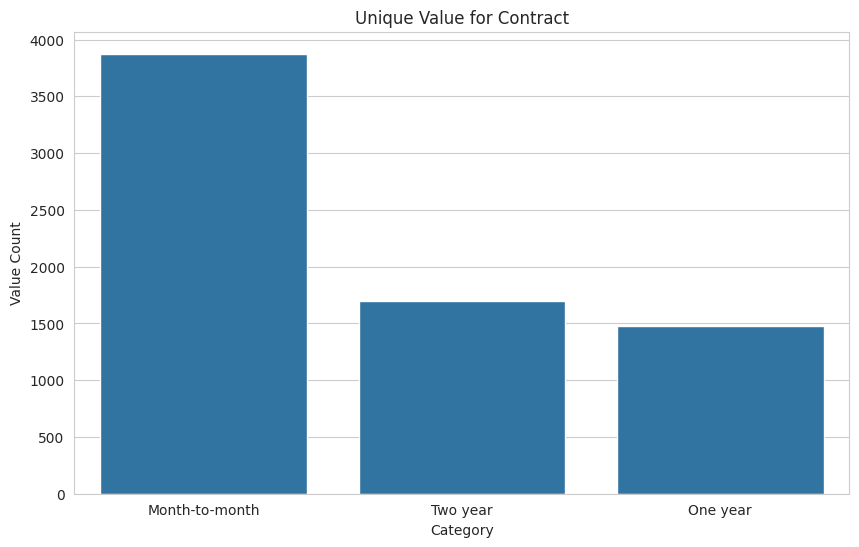

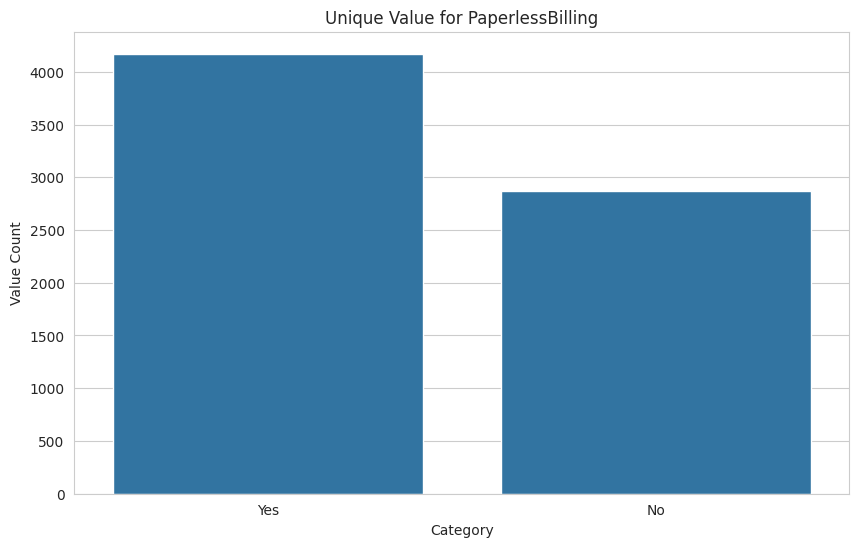

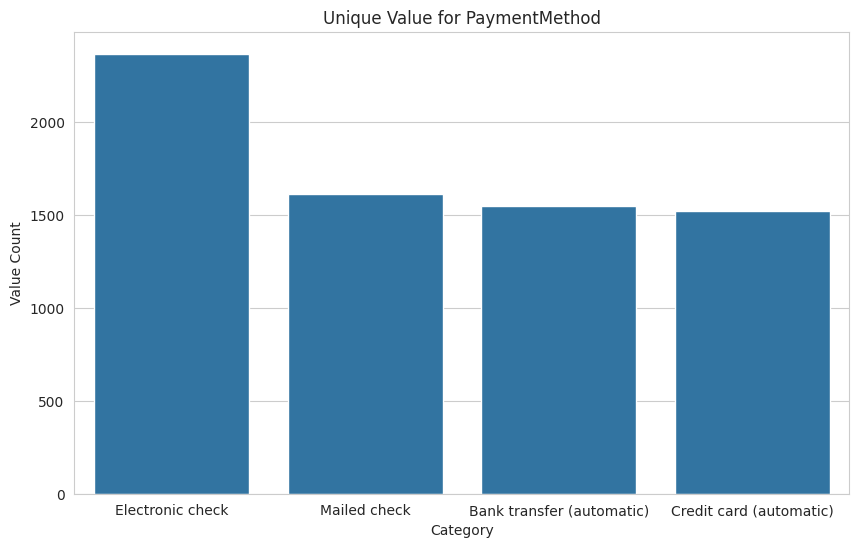

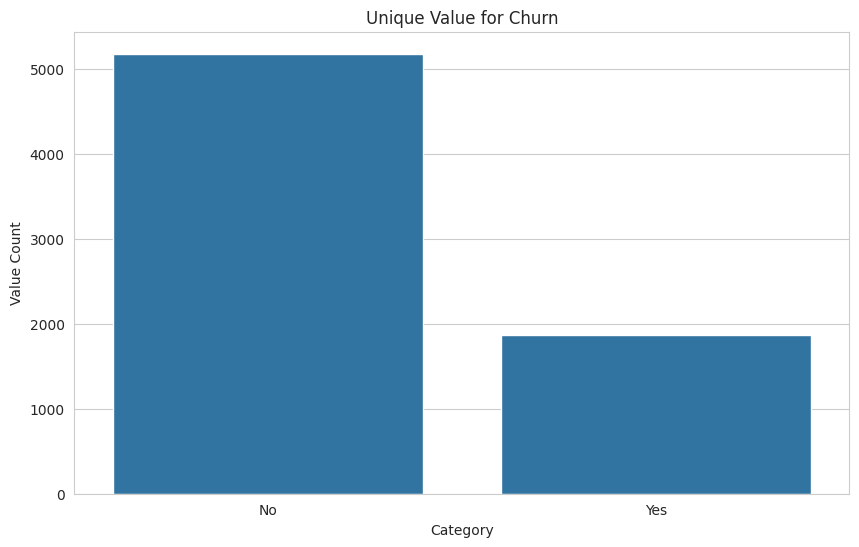

In [530]:
# Plotting bar graphs for each categorical column
for column in catColumns:
  valueCount = df[column].value_counts()
  plt.figure(figsize = (10, 6))
  plt.title(f'Unique Value for {column}')
  plt.xlabel('Category')
  plt.ylabel('Value Count')
  sns.barplot(x = valueCount.index, y = valueCount.values)
  plt.savefig(os.path.join(FIGPATH, f"Unique Value for {column}.png"))
  plt.show()

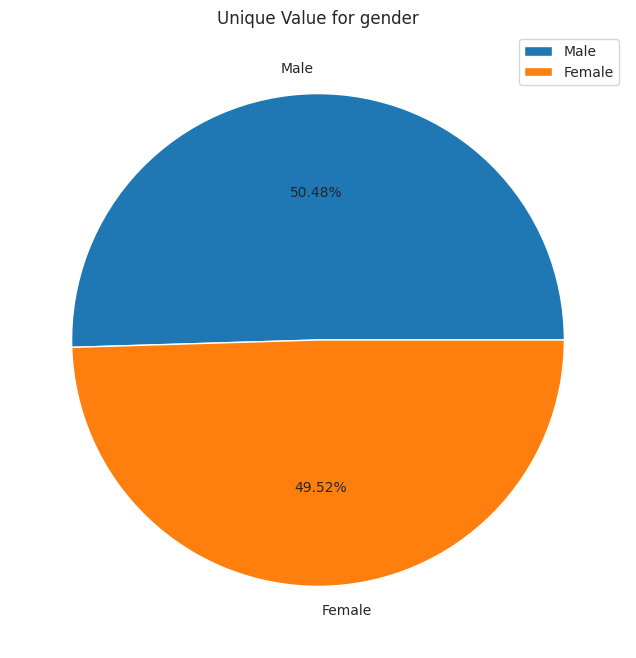

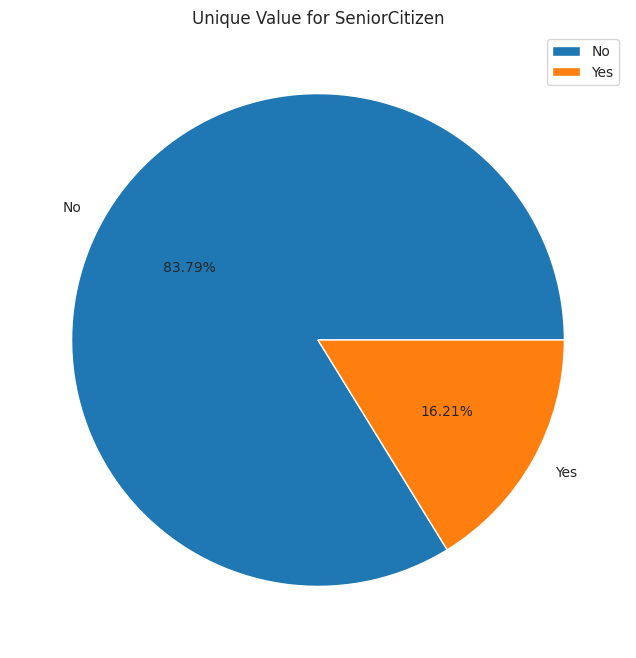

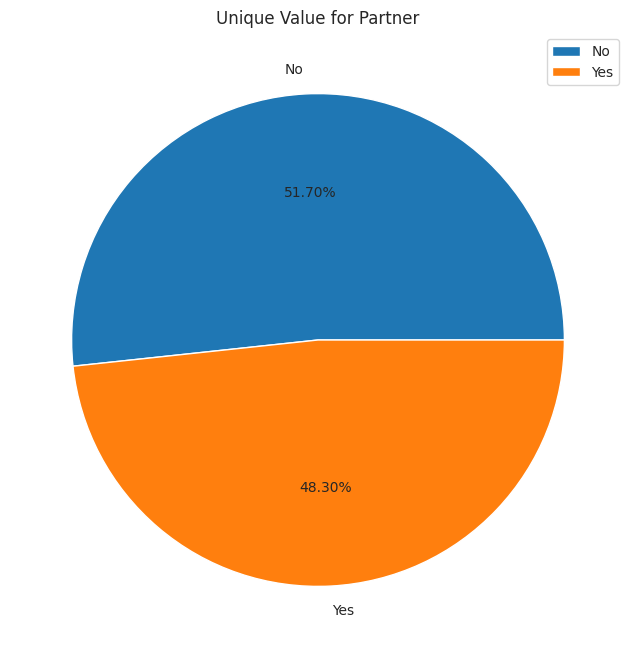

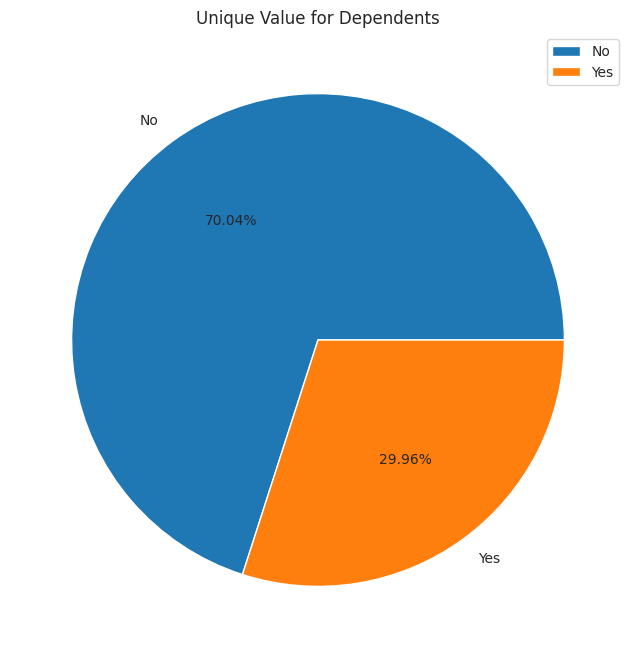

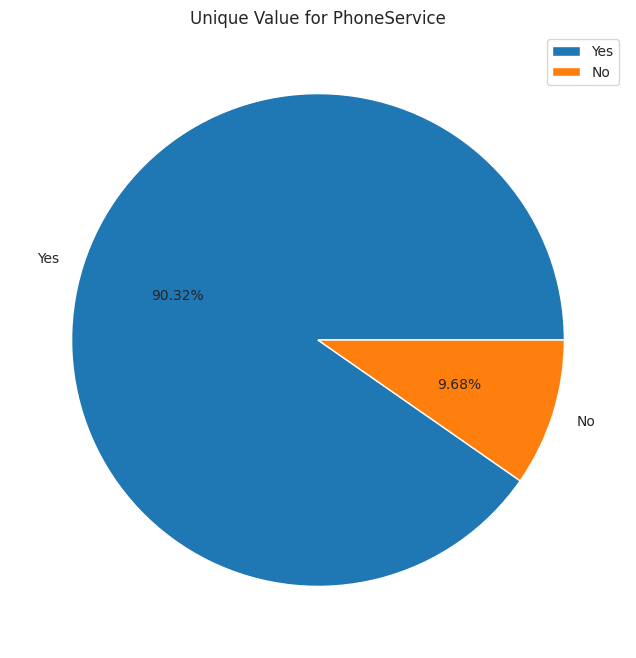

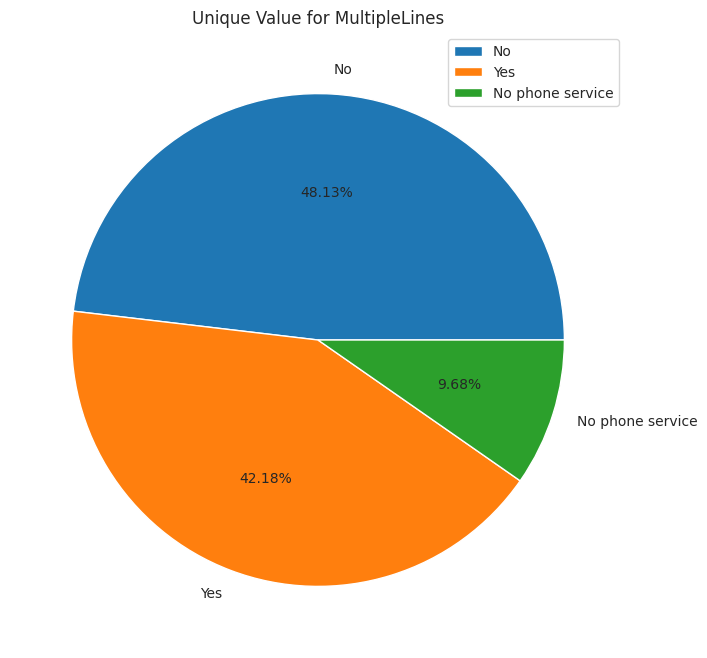

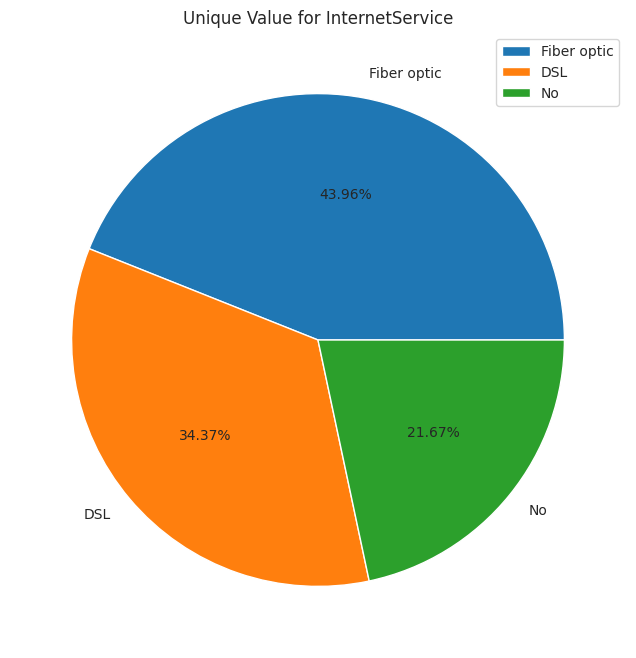

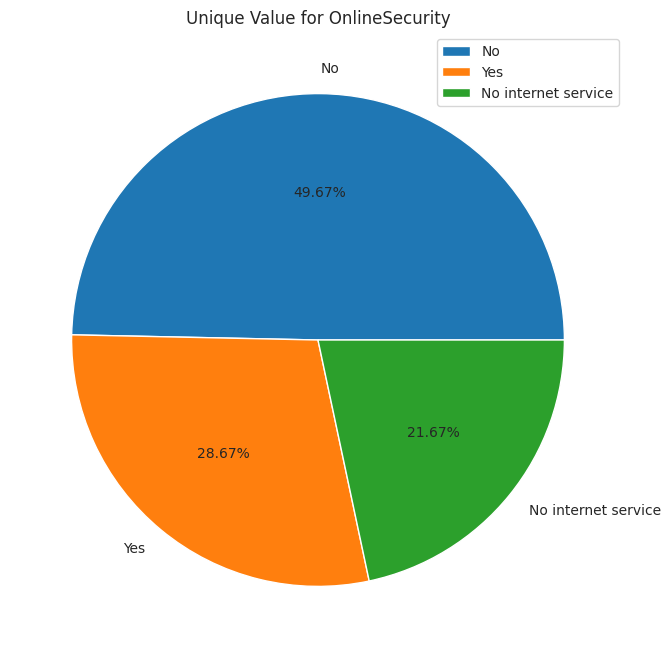

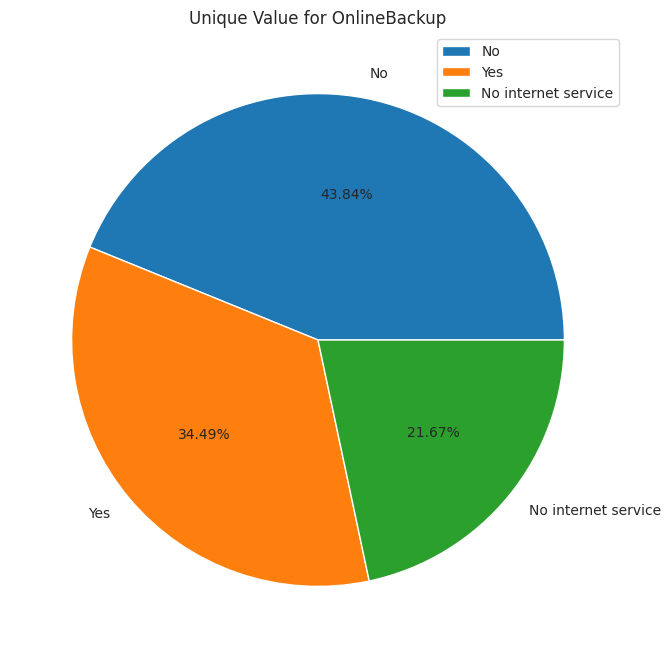

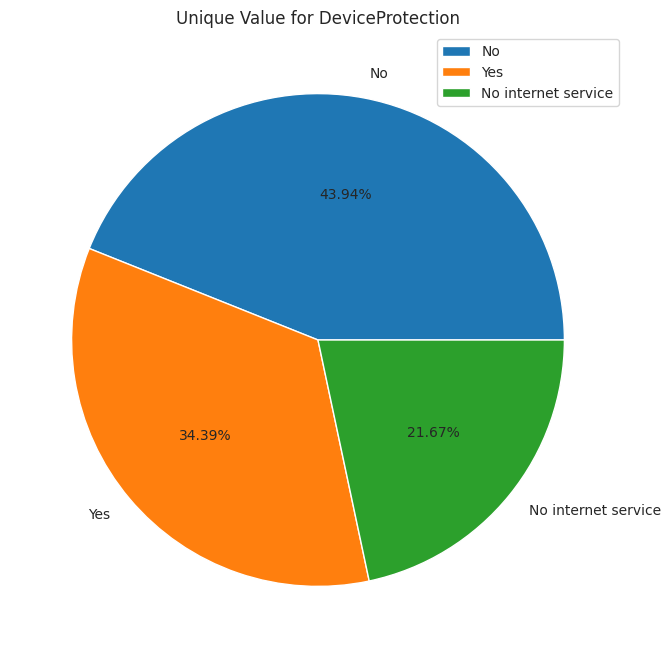

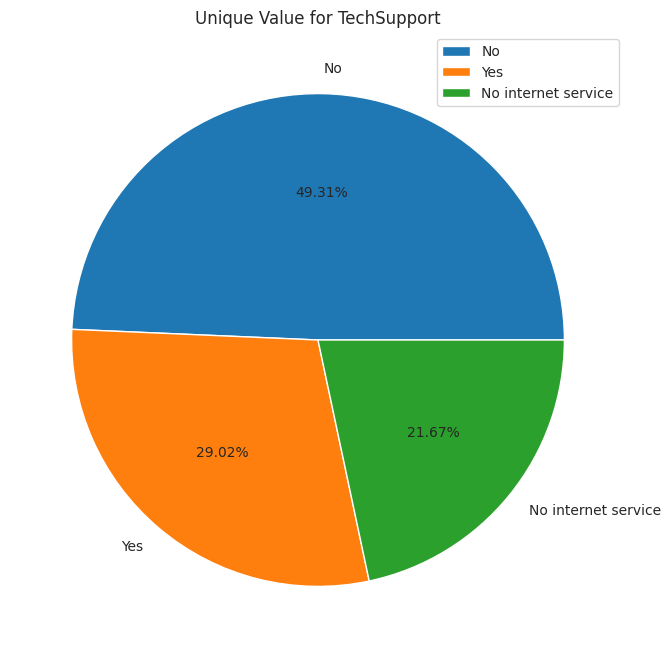

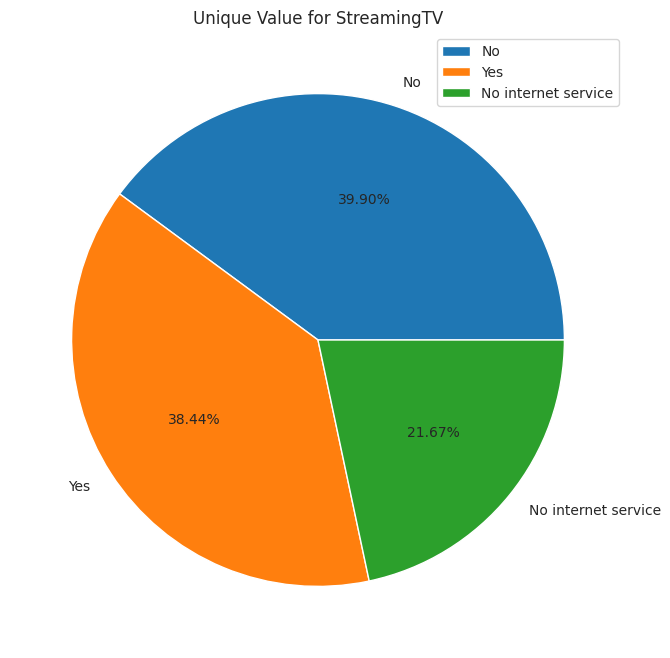

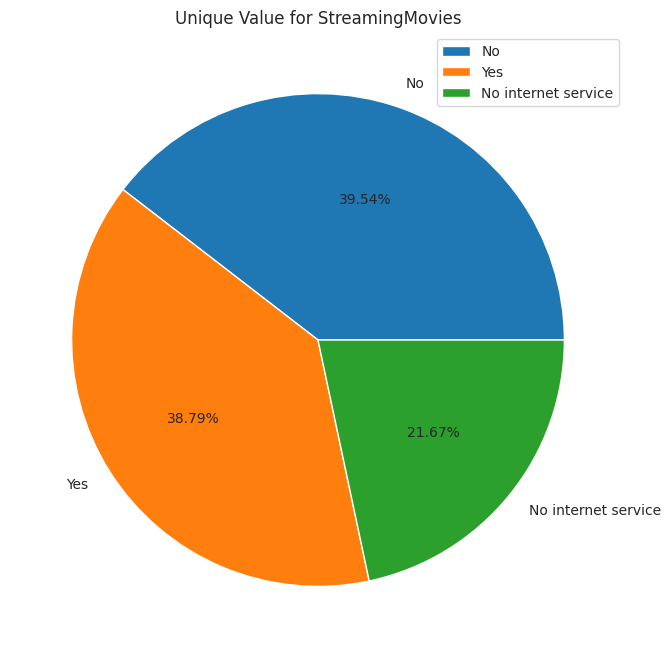

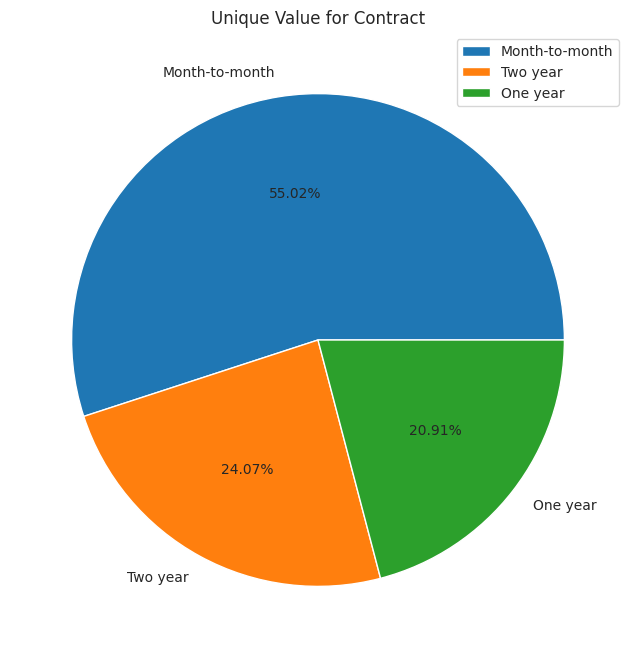

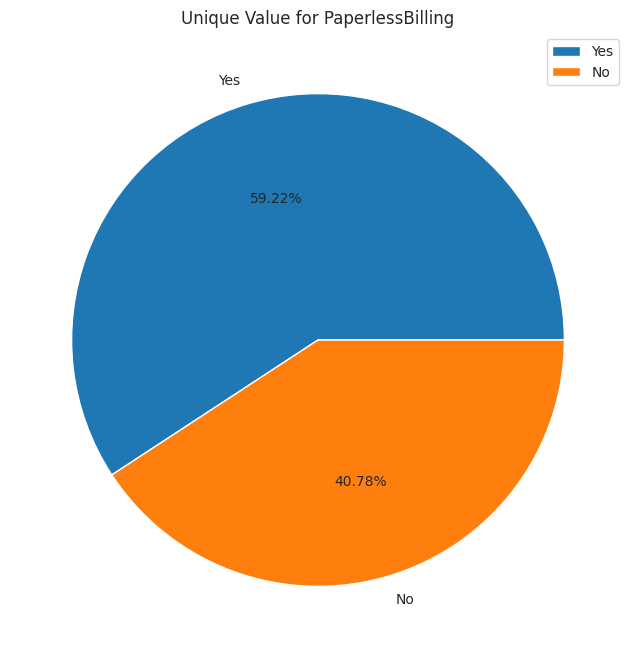

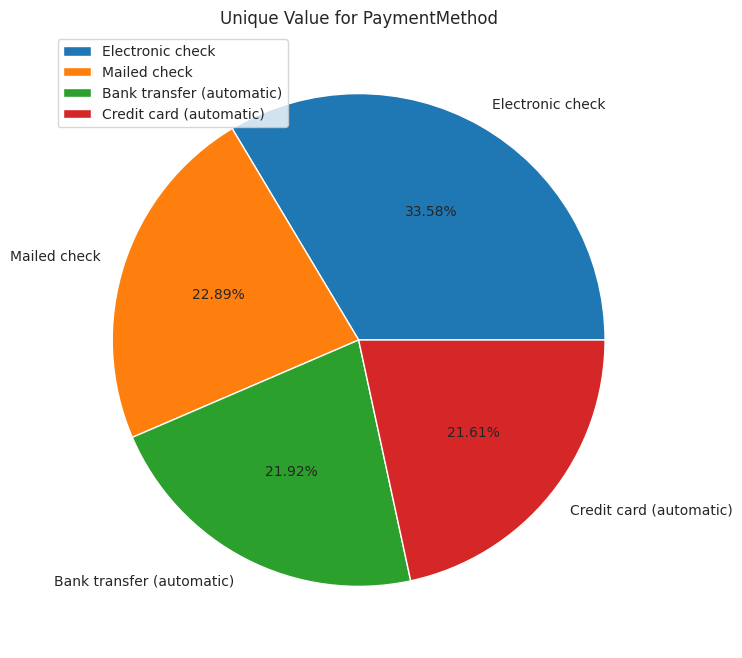

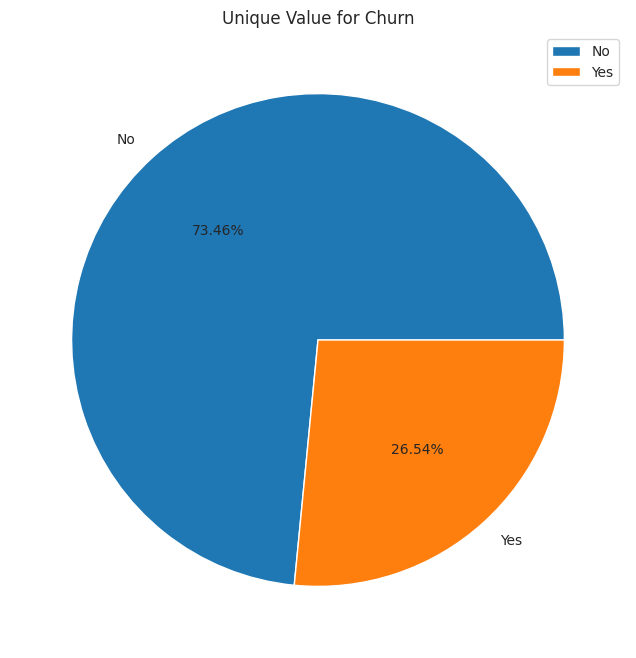

In [531]:
# Plotting pie graphs for each categorical column
for column in catColumns:
  valueCount = df[column].value_counts(normalize=True) * 100
  plt.figure(figsize = (8, 8))
  plt.title(f'Unique Value for {column}')
  plt.pie(labels = valueCount.index, x = valueCount.values, autopct = "%1.2f%%")
  plt.legend()
  plt.savefig(os.path.join(FIGPATH, f"Pie Chart for {column}.png"))
  plt.show()

* Approximately 50% of customers are men and, the other 50% are women.

* Approximately 16% of customers are Senior citizens.

* Approximately 51% of customers have a partner.

* Only 30% of the total customers have dependents.

* 90% of customers receive telephone service.

* Among the 90% who receive telephone service, 48% do not have more than one line.

* Approximately 70% have an internet service provider.

* Approximately 50% do not have an online security.

* Approximately 66% do not have an online backup.

* Most customers do not have device protection and tech support.

* Approximately 38% have streaming TV.

* Approximately 39% have streaming movie.

* Most customers have month-to-month contracts.

* Around 26.5% of customers have left the platform in the last month.

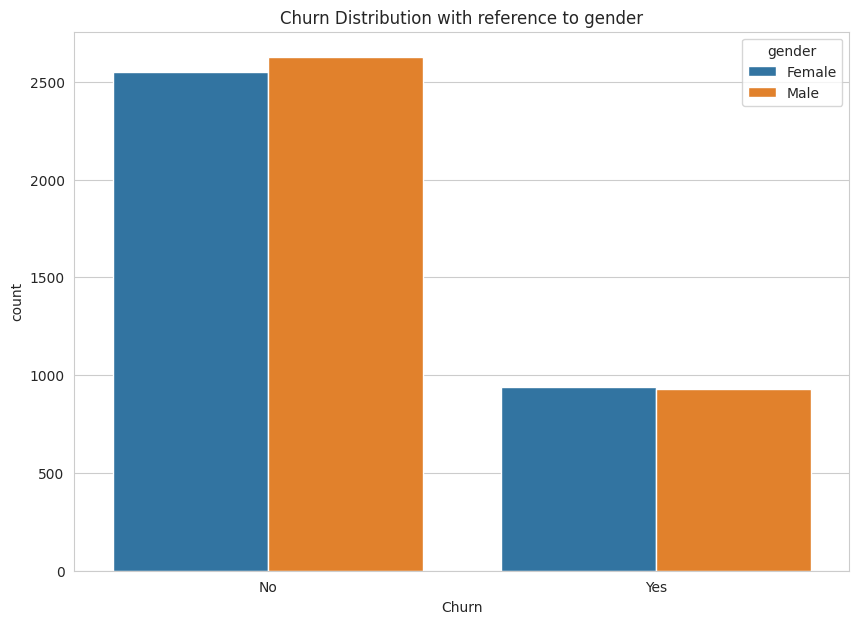

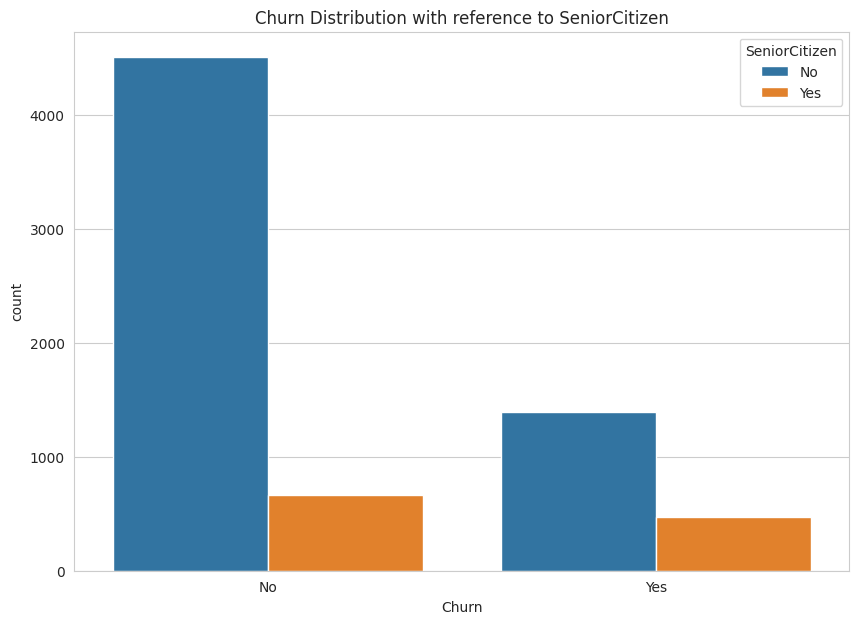

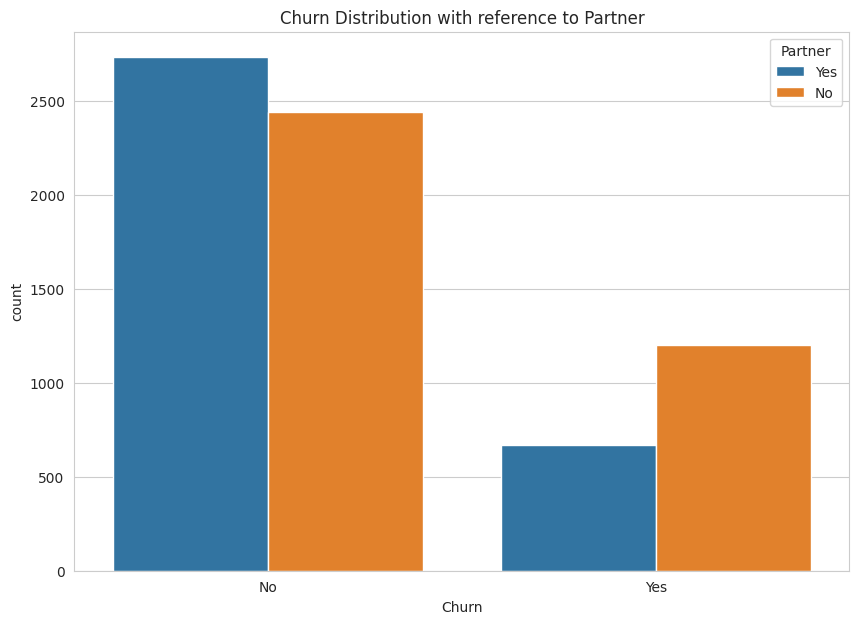

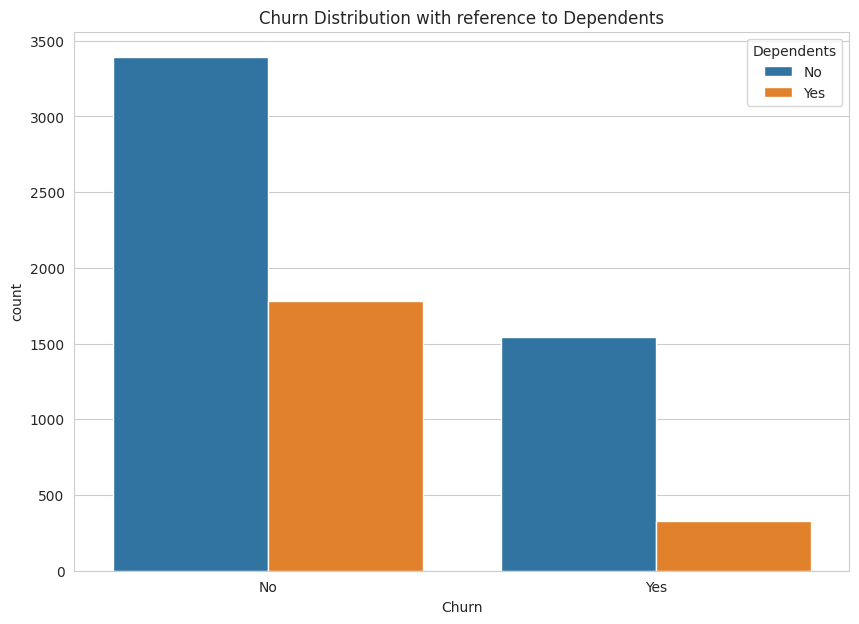

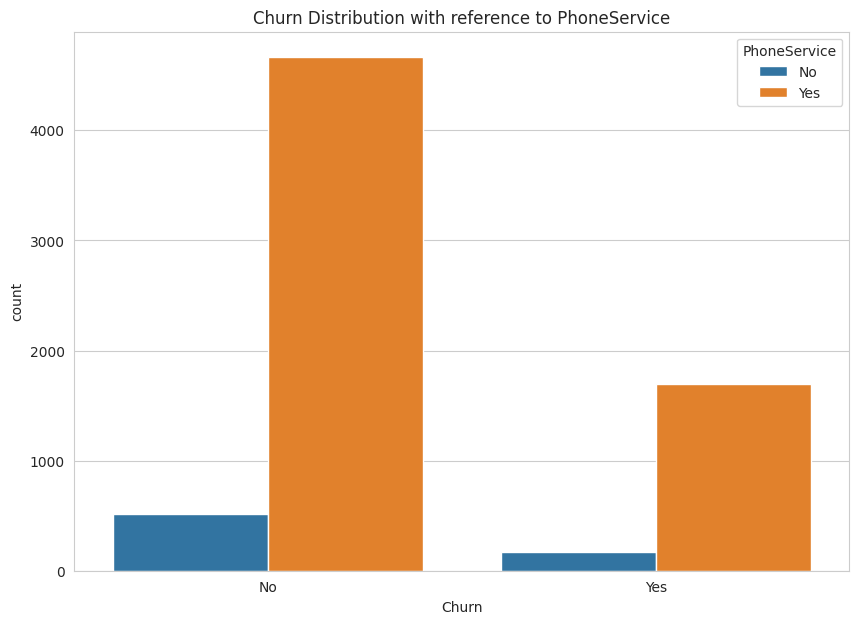

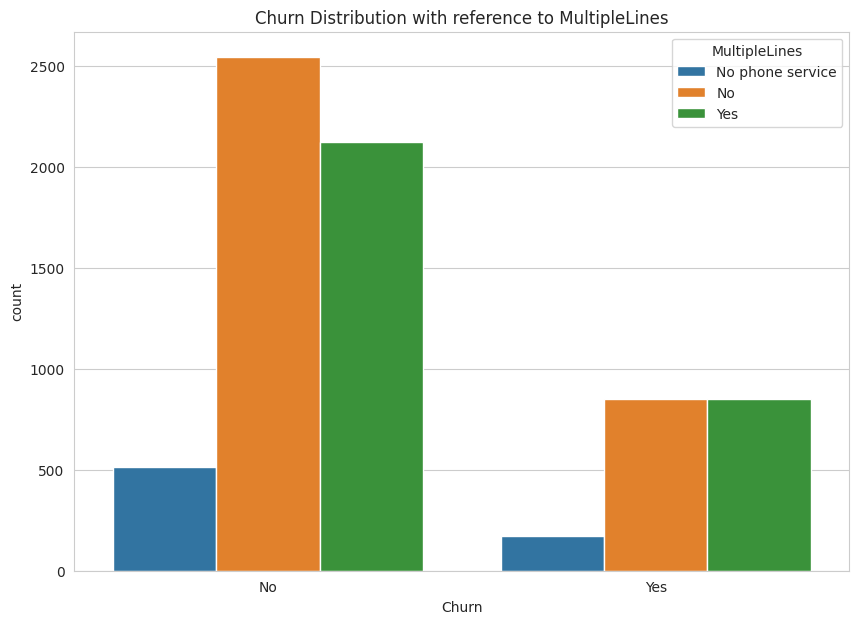

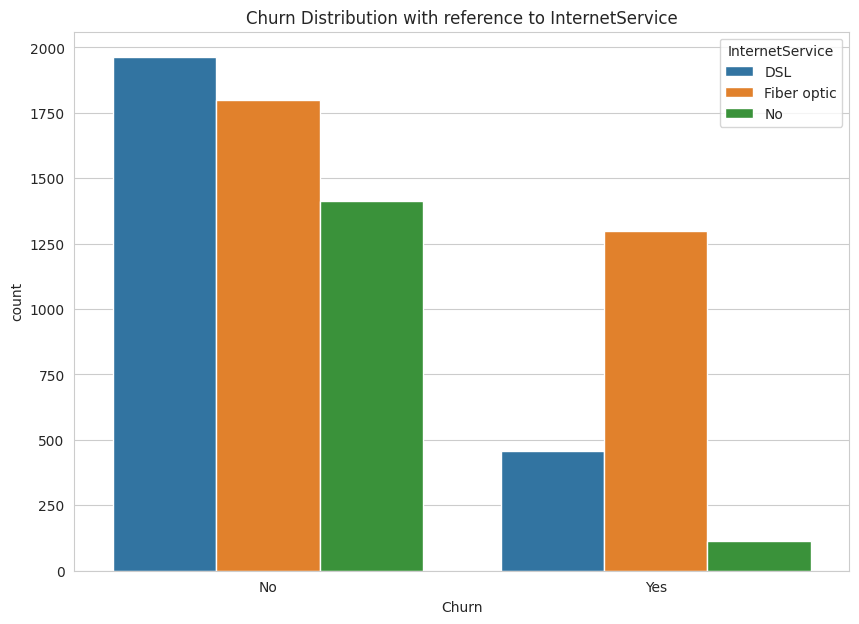

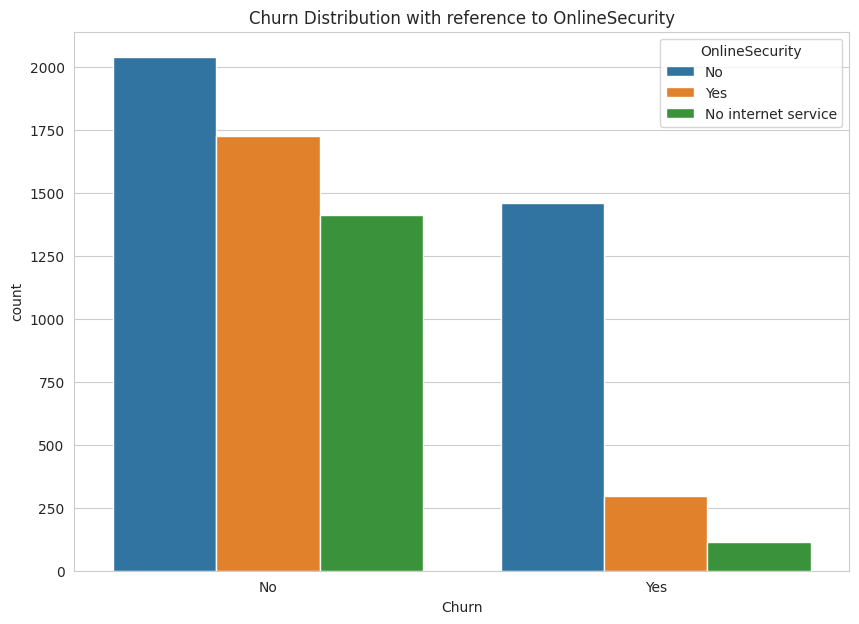

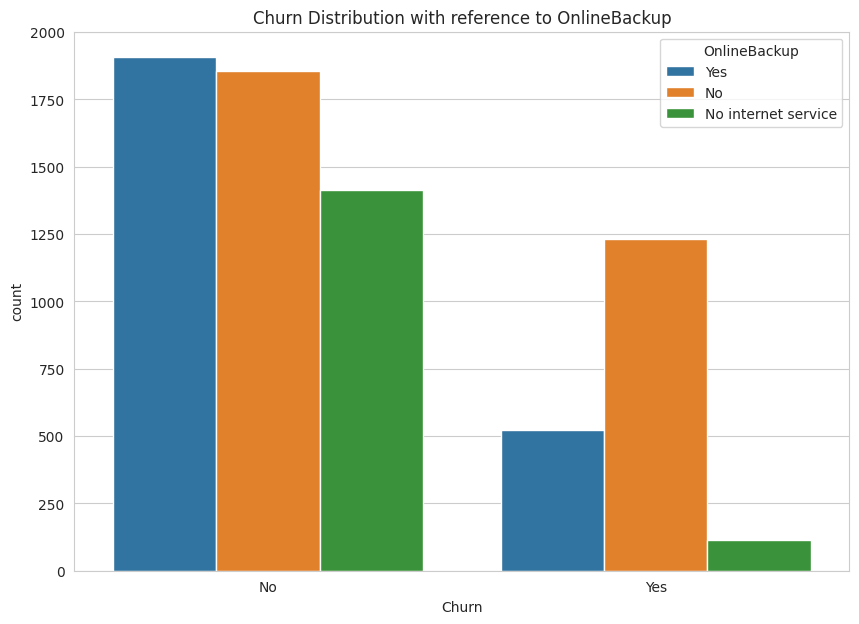

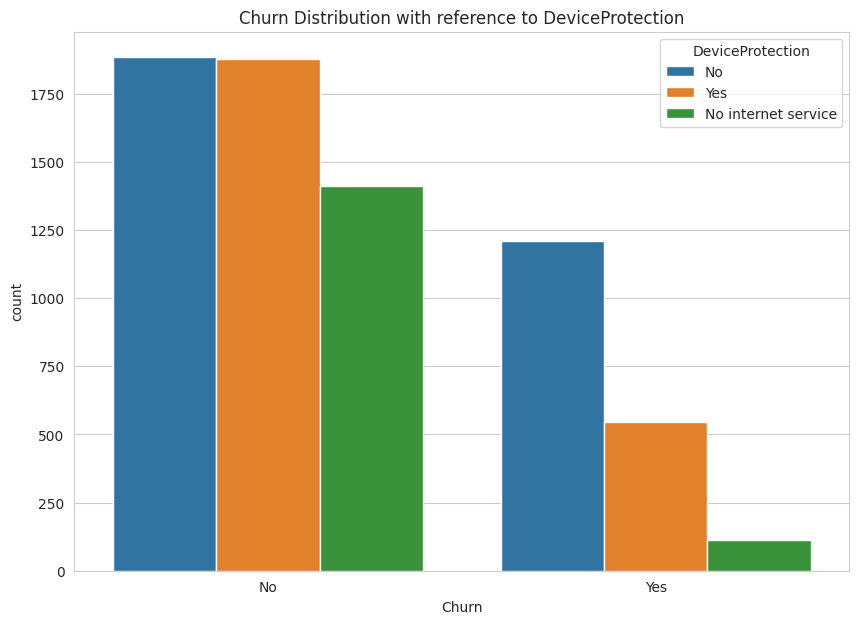

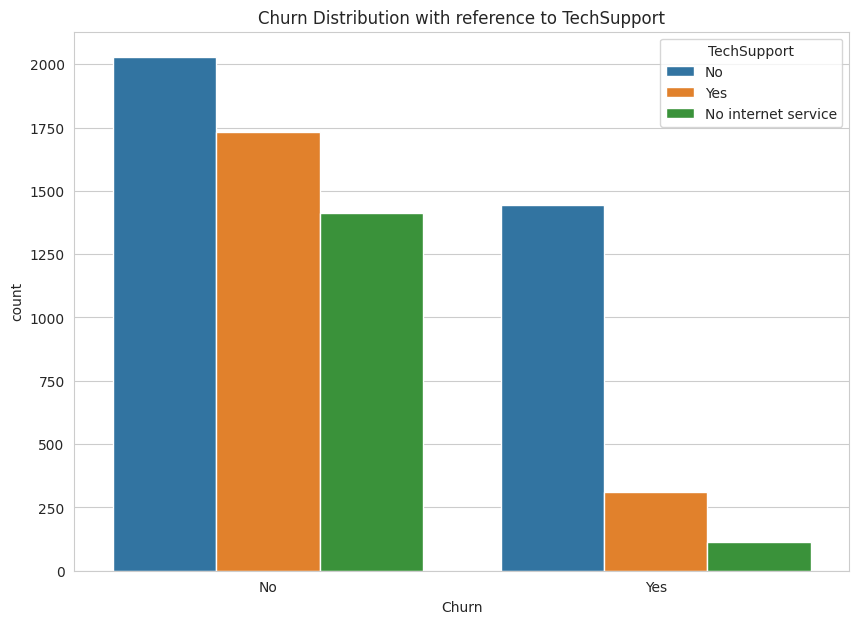

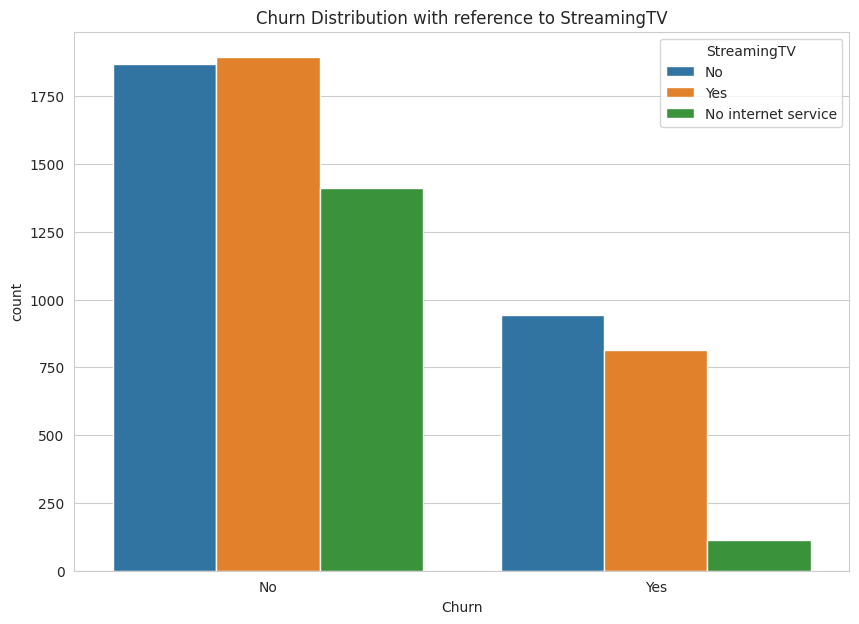

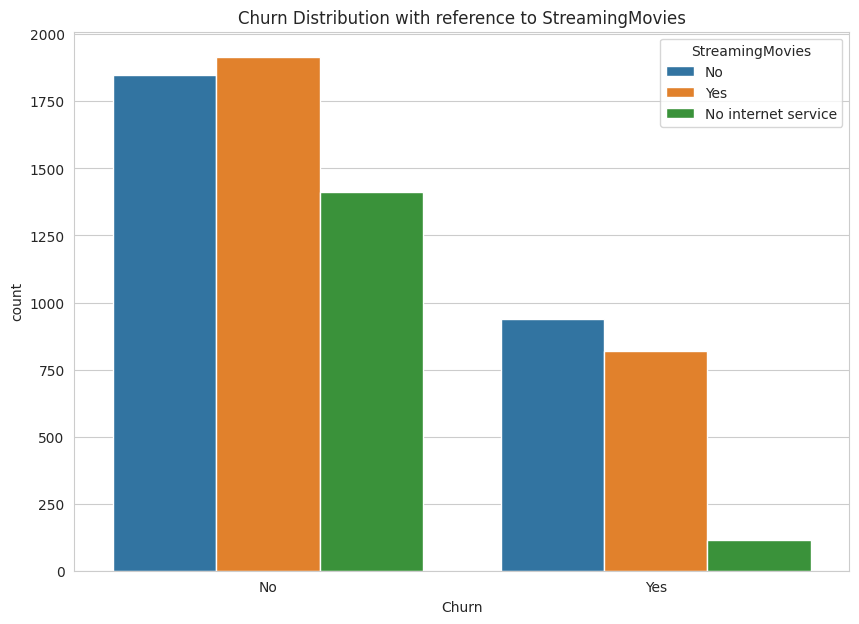

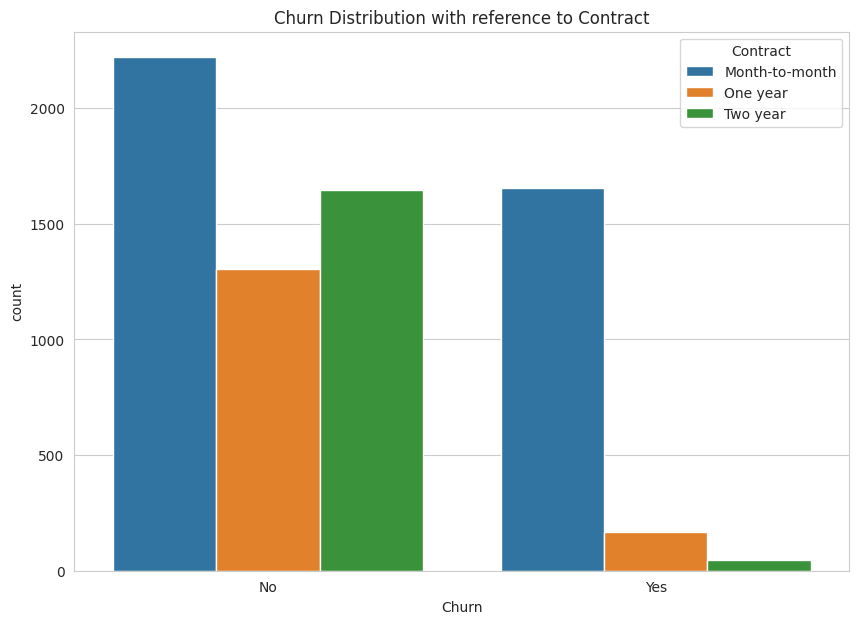

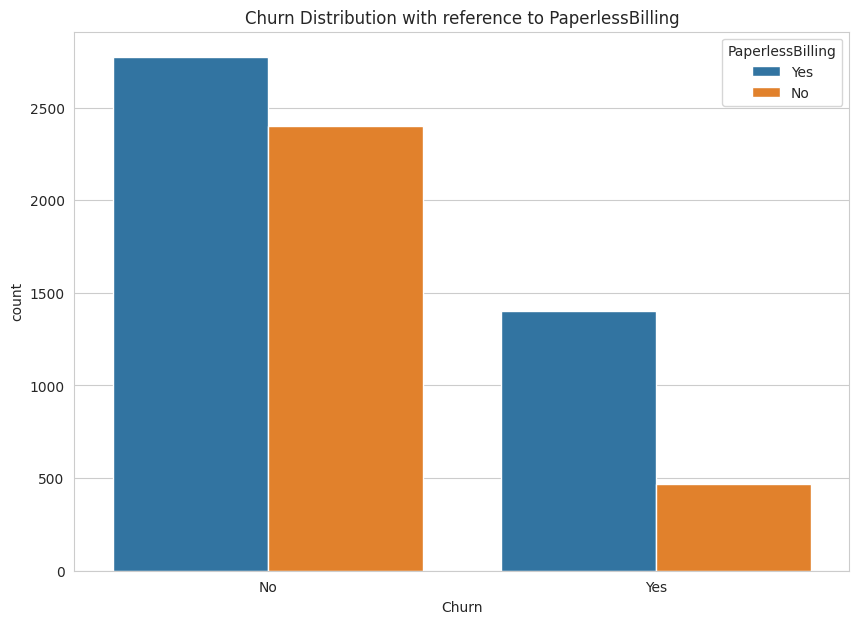

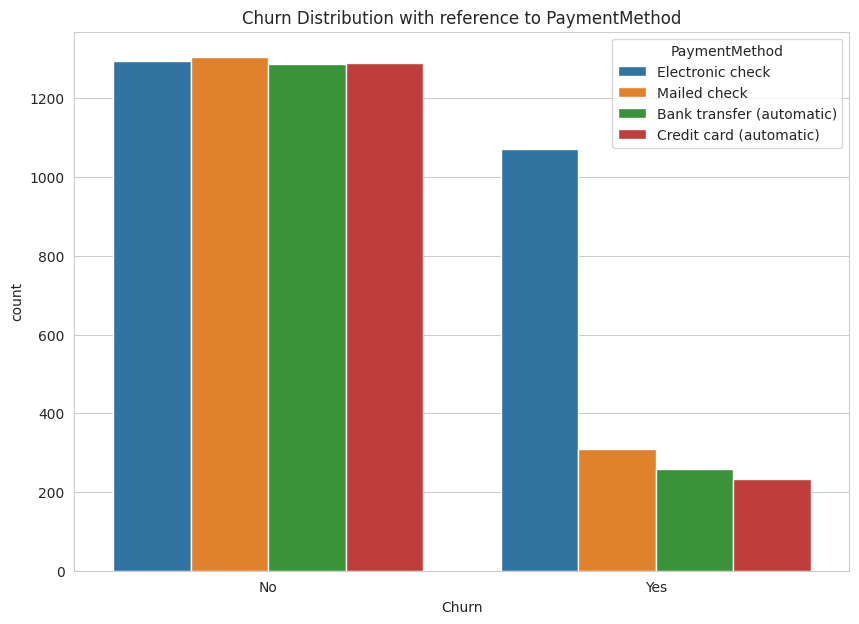

In [532]:
for column in catColumns:
  if column in ['Churn']:
    continue
  plt.figure(figsize = (10, 7))
  sns.countplot(data =df, x="Churn", hue=column)
  plt.title(f"Churn Distribution with reference to {column}")
  plt.savefig(os.path.join(FIGPATH, f"Churn Distribution with reference to {column}.png"))
  plt.show()

* There are no such relation between churn and gender.

* Those younger customers have a higher churn rate.

* Customers without partners or dependents have a high churn rate.

* Customers with phone service have a high churn rate.

* Customers without phone service have a high churn rate.

* Churn rate is higher in customers with Fiber Optic Internet Services.

* Customers without internet security, online backup, device protection have a high churn rate.

* Customers without streming movie or streaming TV have a high churn rate.

* Those with monthly contract have a higher churn rate.

* Those with take paperless bill have a higher churn rate.

* Customers with Electronic Check Payment Method tend to churn the platform more than with other options.


# **NUMERICAL VARIABLES ANALYSIS**

In [533]:
print(f"Numerical columns :  {list(numColumns)} \n")

Numerical columns :  ['tenure', 'MonthlyCharges', 'TotalCharges'] 



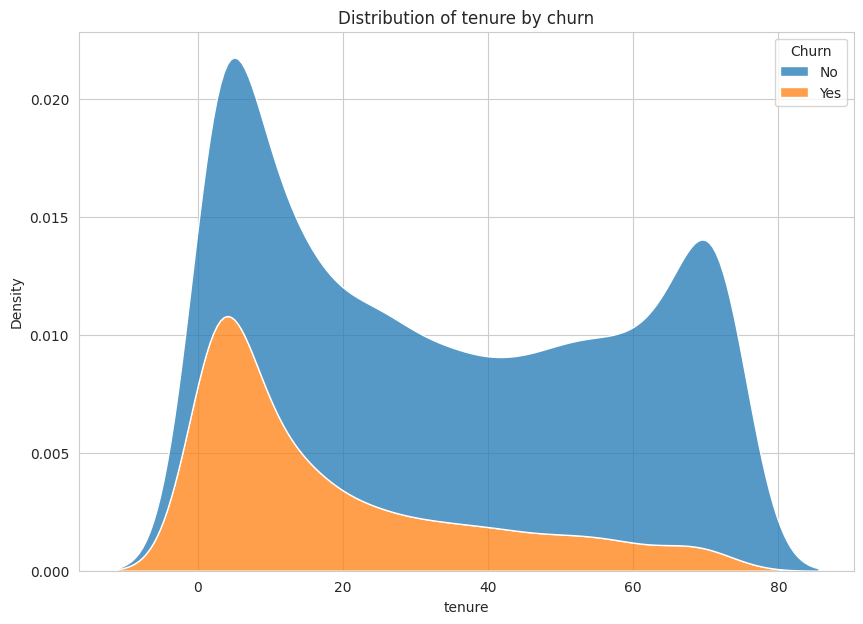

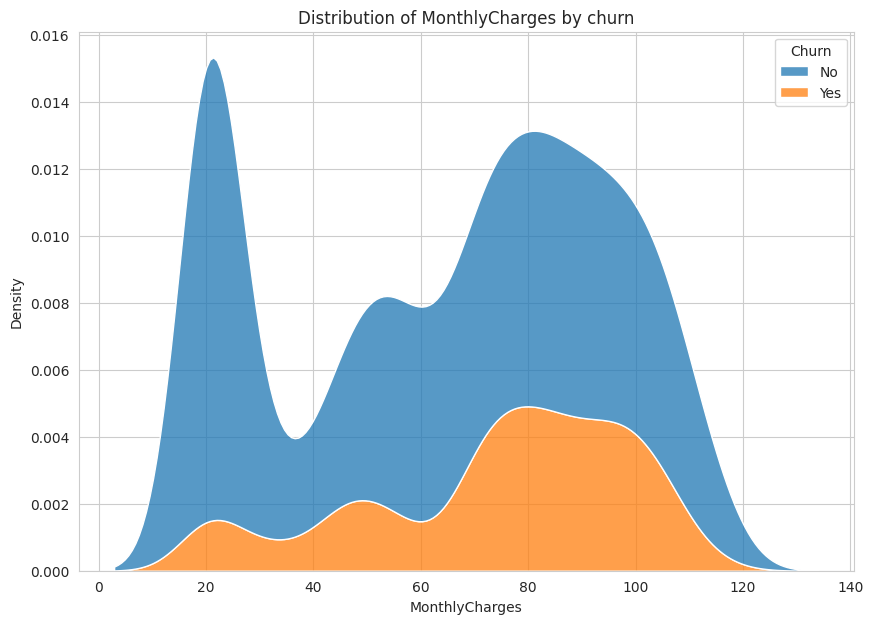

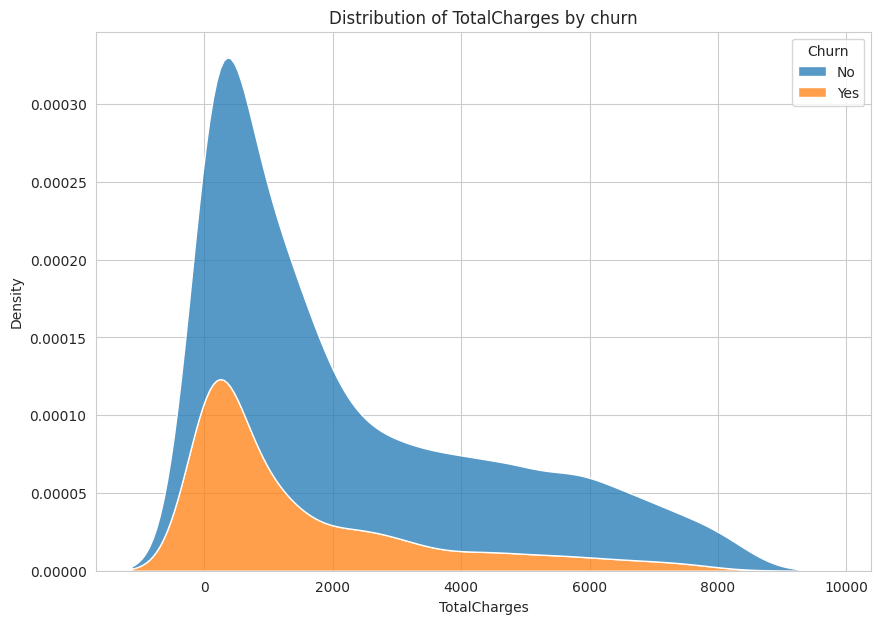

In [534]:
for column in numColumns:
  plt.figure(figsize = (10, 7))
  sns.kdeplot(data = df, x = column, hue="Churn", multiple="stack")
  plt.title(f"Distribution of {column} by churn")
  plt.savefig(os.path.join(FIGPATH, f"Distribution of {column} by churn.png"))
  plt.show()

* Customers with Charges are also more likely to churn.

* New customers has more probability to churn.

# **TEST NORMALITY DISTRIBUTION**



In [535]:
def plotQQ(df, column):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.title(f"histogram for {column}")
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    df[column].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[column],dist='norm',plot=lab)
    plt.show()

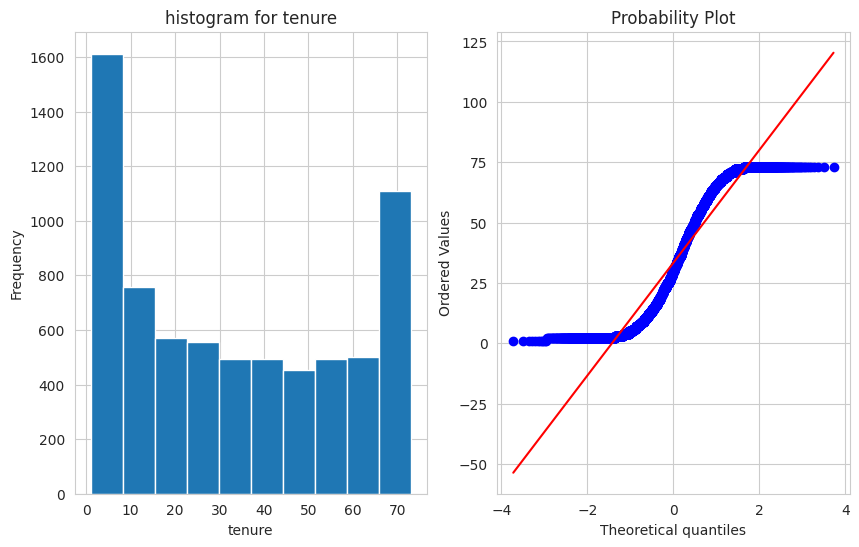

Shapiro Test for tenure column
	 It does not look normally distributed (Reject H0)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



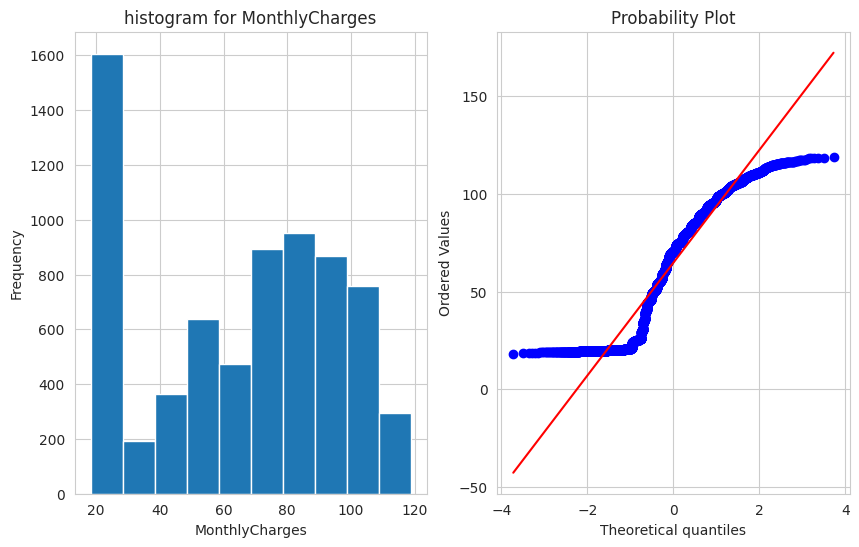

Shapiro Test for MonthlyCharges column
	 It does not look normally distributed (Reject H0)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



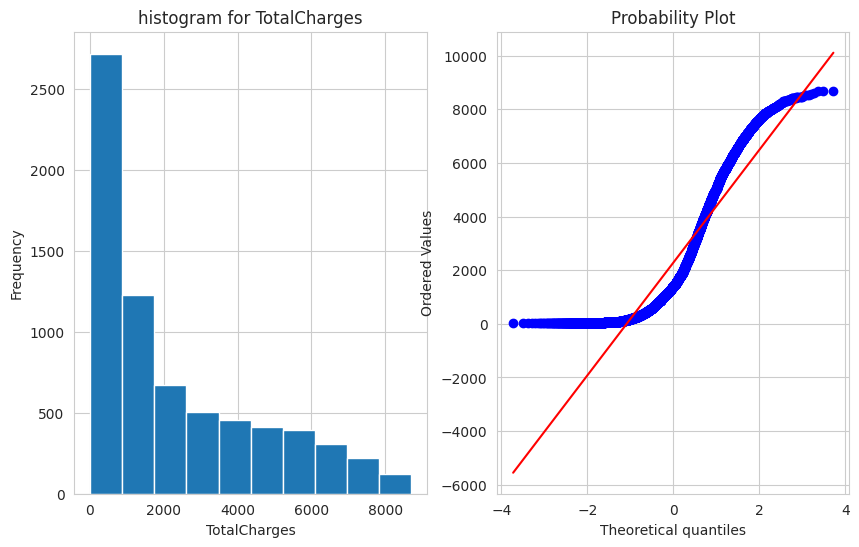

Shapiro Test for TotalCharges column
	 It does not look normally distributed (Reject H0)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [536]:
for column in numColumns:
  stat, p = stats.shapiro(df[column])
  plotQQ(df, column)
  print(f'Shapiro Test for {column} column')
  if p > 0.05:
    print(f'\t It normally distributed (Accept H0)')
  else:
    print(f'\t It does not look normally distributed (Reject H0)')
  print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

# **IDENTIFY OUTLIERS**

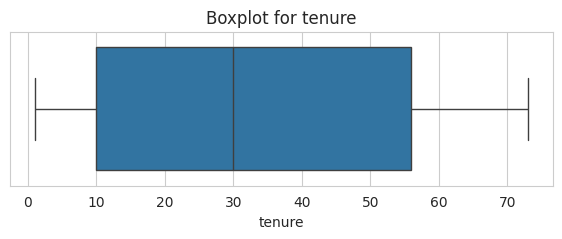

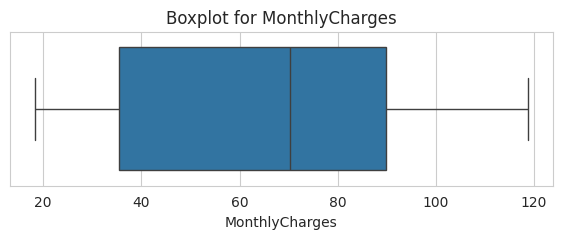

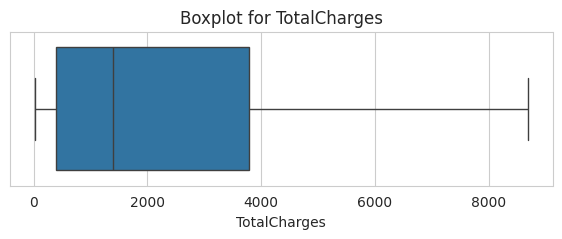

In [537]:
for column in numColumns:
  plt.figure(figsize = (7, 2))
  plt.title(f"Boxplot for {column}")
  sns.boxplot(data =df, x=column)
  plt.savefig(os.path.join(FIGPATH, f"Boxplot for {column}.png"))
  plt.show()

There are no outliers in the numerical columns, and thus, there is no need to treat or address them.

In [538]:
def handleOutliers(df, numColumns):
  for column in numColumns:
      q1 = df[column].quantile(0.25)
      q3 = df[column].quantile(0.75)
      IQR = q3 - q1
      upper = q3 + (1.5 * IQR)
      lower = q1 - (1.5 * IQR)
      df.loc[(df[column] > upper), i] = upper
      df.loc[(df[column] < lower), i] = lower

# **CORRELATION**

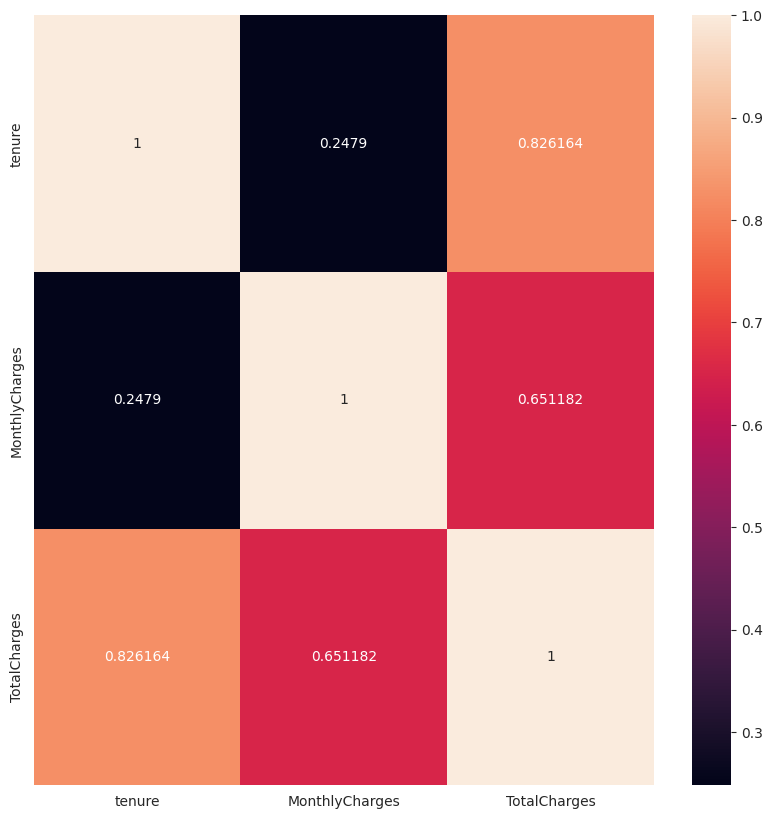

In [539]:
correlation = df[numColumns].corr()

plt.figure(figsize = (10, 10))
sns.heatmap(data = correlation, fmt ='g', annot=True)
plt.show()

TotalChargers is highly correlated with tenure.

# **FEATURE ENCODING**

In [580]:
for column in catColumns:
  print(f"\n{column} column contain :\n")
  print(f"{df[column].unique()}\n")
  print(f"{df[column].value_counts()}\n")
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")


gender column contain :

['Female' 'Male']

Male      3555
Female    3488
Name: gender, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

SeniorCitizen column contain :

['No' 'Yes']

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Partner column contain :

['Yes' 'No']

No     3641
Yes    3402
Name: Partner, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

Dependents column contain :

['No' 'Yes']

No     4933
Yes    2110
Name: Dependents, dtype: int64

---------------------------------------------------------------------------------------------------------

* 'gender', 'PaymentMethod', 'Contract', 'InternetService' columns need one hot encording.

* Other categorical columns need label encording.

* When there is no value in the 'Internet Service' column, it implies the absence of internet service, and all other features corresponding to no internet services can be inferred from the remaining columns.

* When there is no value in the 'Phone Service' column, it implies the absence of phone service, and all other features corresponding to no phone services can be inferred from the remaining columns.


In [581]:
print(f"Feature size to be encorded : {len(catColumns)}")
print(f"Features to be one hot encorded : {['gender', 'PaymentMethod', 'Contract', 'InternetService']}")
print(f"Feature size to be one hot encorded : {len(['gender', 'PaymentMethod', 'Contract', 'InternetService'])}")
print(f"Features to be label encorded : {set(catColumns) - set(['gender', 'PaymentMethod', 'Contract', 'InternetService'])}")
print(f"Feature size to be label encorded {len(list(set(catColumns) - set(['gender', 'PaymentMethod', 'Contract', 'InternetService'])))}")

Feature size to be encorded : 17
Features to be one hot encorded : ['gender', 'PaymentMethod', 'Contract', 'InternetService']
Feature size to be one hot encorded : 4
Features to be label encorded : {'StreamingMovies', 'StreamingTV', 'OnlineBackup', 'DeviceProtection', 'Dependents', 'PaperlessBilling', 'TechSupport', 'MultipleLines', 'Churn', 'PhoneService', 'Partner', 'OnlineSecurity', 'SeniorCitizen'}
Feature size to be label encorded 13


In [582]:
encordedDf = df[numColumns].copy()

In [583]:
encordedDf['SeniorCitizen'] = df['SeniorCitizen'].map({
    "No" : 0,
    "Yes" : 1,
})

In [584]:
encordedDf['Partner'] = df['Partner'].map({
    "No" : 0,
    "Yes" : 1,
})

In [585]:
encordedDf['Dependents'] = df['Dependents'].map({
    "No" : 0,
    "Yes" : 1,
})

In [586]:
encordedDf['PhoneService'] = df['PhoneService'].map({
    "No" : 0,
    "Yes" : 1,
})

In [587]:
encordedDf['MultipleLines'] = df['MultipleLines'].map({
    "No" : 0,
    "Yes" : 1,
  "No phone service" : 0
})

In [588]:
encordedDf['OnlineSecurity'] = df['OnlineSecurity'].map({
    "No" : 0,
    "Yes" : 1,
  "No internet service" : 0
})

In [589]:
encordedDf['OnlineBackup'] = df['OnlineBackup'].map({
    "No" : 0,
    "Yes" : 1,
  "No internet service" : 0
})

In [590]:
encordedDf['DeviceProtection'] = df['DeviceProtection'].map({
    "No" : 0,
    "Yes" : 1,
  "No internet service" : 0
})

In [591]:
encordedDf['TechSupport'] = df['TechSupport'].map({
    "No" : 0,
    "Yes" : 1,
  "No internet service" : 0
})

In [592]:
encordedDf['StreamingTV'] = df['StreamingTV'].map({
    "No" : 0,
    "Yes" : 1,
  "No internet service" : 0
})

In [593]:
encordedDf['StreamingMovies'] = df['StreamingMovies'].map({
    "No" : 0,
    "Yes" : 1,
  "No internet service" : 0
})

In [594]:
encordedDf['PaperlessBilling'] = df['PaperlessBilling'].map({
    "No" : 0,
    "Yes" : 1
  })

In [595]:
encordedDf['Churn'] = df['Churn'].map({
    "No" : 0,
    "Yes" : 1,
})

In [596]:
encordedDf.head()

tenure  MonthlyCharges  TotalCharges  SeniorCitizen  Partner  Dependents  \
0       2           29.85         29.85              0        1           0   
1      35           56.95       1889.50              0        0           0   
2       3           53.85        108.15              0        0           0   
3      46           42.30       1840.75              0        0           0   
4       3           70.70        151.65              0        0           0   

   PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
0             0              0               0             1   
1             1              0               1             0   
2             1              0               1             1   
3             0              0               1             0   
4             1              0               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   
2                 0            0            0                0   
3                 1            1            0                0   
4                 0            0            0                0   

   PaperlessBilling  Churn  
0                 1      0  
1                 0      0  
2                 1      1  
3                 0      0  
4                 1      1

In [597]:
print(f"encordedDf shape: {encordedDf.shape}")

encordedDf shape: (7043, 16)


In [598]:
encordedDf = pd.concat([encordedDf, df[['gender', 'PaymentMethod', 'Contract', 'InternetService']]], axis = 1)

In [599]:
encordedDf.head()

tenure  MonthlyCharges  TotalCharges  SeniorCitizen  Partner  Dependents  \
0       2           29.85         29.85              0        1           0   
1      35           56.95       1889.50              0        0           0   
2       3           53.85        108.15              0        0           0   
3      46           42.30       1840.75              0        0           0   
4       3           70.70        151.65              0        0           0   

   PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
0             0              0               0             1   
1             1              0               1             0   
2             1              0               1             1   
3             0              0               1             0   
4             1              0               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   
2                 0            0            0                0   
3                 1            1            0                0   
4                 0            0            0                0   

   PaperlessBilling  Churn  gender              PaymentMethod        Contract  \
0                 1      0  Female           Electronic check  Month-to-month   
1                 0      0    Male               Mailed check        One year   
2                 1      1    Male               Mailed check  Month-to-month   
3                 0      0    Male  Bank transfer (automatic)        One year   
4                 1      1  Female           Electronic check  Month-to-month   

  InternetService  
0             DSL  
1             DSL  
2             DSL  
3             DSL  
4     Fiber optic

In [600]:
print(f"encordedDf shape: {encordedDf.shape}")

encordedDf shape: (7043, 20)


In [601]:
encordedDf = pd.get_dummies(data = encordedDf, columns =['gender', 'PaymentMethod', 'Contract', 'InternetService'], drop_first=True)

In [602]:
encordedDf.head()

tenure  MonthlyCharges  TotalCharges  SeniorCitizen  Partner  Dependents  \
0       2           29.85         29.85              0        1           0   
1      35           56.95       1889.50              0        0           0   
2       3           53.85        108.15              0        0           0   
3      46           42.30       1840.75              0        0           0   
4       3           70.70        151.65              0        0           0   

   PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  ...  \
0             0              0               0             1  ...   
1             1              0               1             0  ...   
2             1              0               1             1  ...   
3             0              0               1             0  ...   
4             1              0               0             0  ...   

   PaperlessBilling  Churn  gender_Male  \
0                 1      0            0   
1                 0      0            1   
2                 1      1            1   
3                 0      0            1   
4                 1      1            0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Contract_One year  Contract_Two year  \
0                           0                  0                  0   
1                           1                  1                  0   
2                           1                  0                  0   
3                           0                  1                  0   
4                           0                  0                  0   

   InternetService_Fiber optic  InternetService_No  
0                            0                   0  
1                            0                   0  
2                            0                   0  
3                            0                   0  
4                            1                   0  

[5 rows x 24 columns]

In [603]:
print(f"encordedDf shape: {encordedDf.shape}")

encordedDf shape: (7043, 24)


In [604]:
print(f"Columns of encoreddf : {encordedDf.columns}")

Columns of encoreddf : Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Churn', 'gender_Male',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')


# **Train/Test Split**

In [605]:
X = encordedDf.drop(columns =['Churn'], axis = 1)
y = encordedDf[['Churn']]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (7043, 23)
y shape: (7043, 1)


In [606]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.76, random_state = 6, shuffle=True)

In [607]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5352, 23)
X_test shape: (1691, 23)
y_train shape: (5352, 1)
y_test shape: (1691, 1)


# **SCALING THE DATA**

The numeric features need standard scaling to bring them to same distribution scale.

In [608]:
scalar = StandardScaler()
scalar.fit(X_train[numColumns])

StandardScaler()

In [610]:
X_train_sc = pd.DataFrame(scalar.transform(X_train[numColumns]), columns= numColumns, index=X_train[numColumns].index)
X_test_sc = pd.DataFrame(scalar.transform(X_test[numColumns]), columns= numColumns, index=X_test[numColumns].index)

In [611]:
X_train.drop(columns=numColumns, inplace=True, axis=1)
X_test.drop(columns=numColumns, inplace=True, axis=1)

In [612]:
X_train = pd.concat([X_train, X_train_sc], axis=1)
X_test = pd.concat([X_test, X_test_sc], axis=1)

In [613]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5352, 23)
X_test shape: (1691, 23)
y_train shape: (5352, 1)
y_test shape: (1691, 1)


# **SOLVE IMBALANCED**

Churn
0        3917
1        1435
dtype: int64


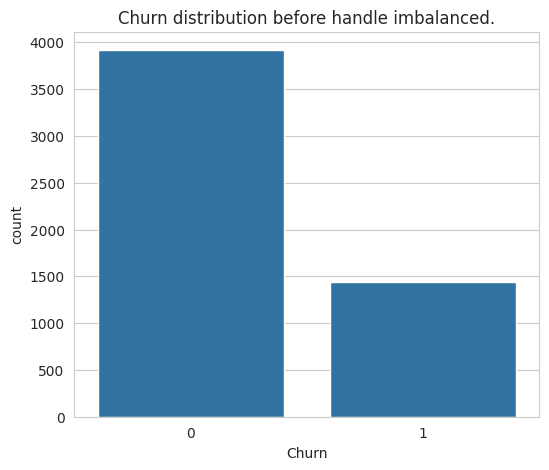

Total observations = 5352


In [635]:
print(y_train.value_counts())
plt.figure(figsize=(6, 5))
plt.title(f"Churn distribution before handle imbalanced.")
sns.countplot(data = y_train, x= 'Churn')
plt.show()

print(f"Total observations = {len(y_train.index)}")

In [639]:
def getCount(y, yBalanced):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  plt.title(f"Churn distribution before handle imbalanced.")
  sns.countplot(data = y, x= 'Churn')
  plt.subplot(1,2,2)
  plt.title(f"Churn distribution after handle imbalanced.")
  sns.countplot(data = yBalanced, x= 'Churn')
  plt.show()

  print(f"Total observations before {len(y.index)}")
  print(f"Total observations after {len(yBalanced.index)}")

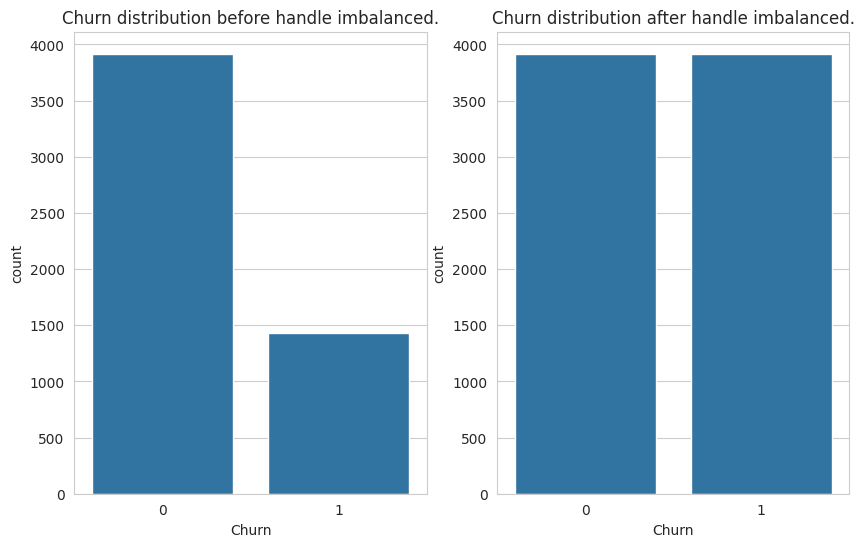

Total observations before 5352
Total observations after 7834


In [642]:
#RandomOverSampler
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

getCount(y_train, y_train_ros)

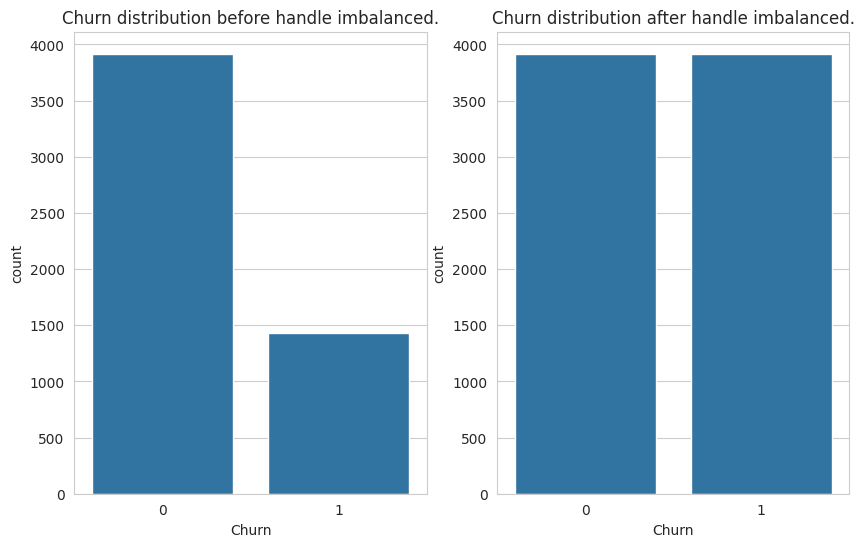

Total observations before 5352
Total observations after 7828


In [643]:
# ADASYN
ad = ADASYN()
X_train_ad, y_train_ad = ad.fit_resample(X_train, y_train)

getCount(y_train, y_train_ad)

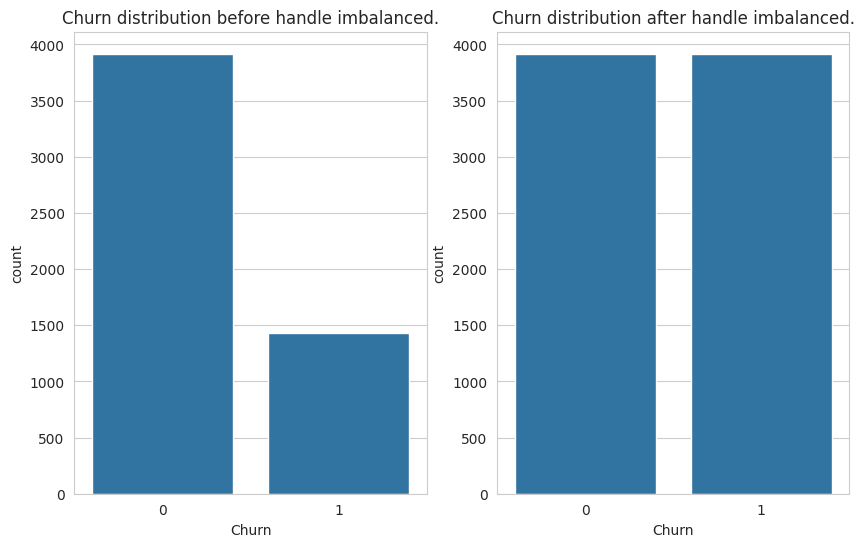

Total observations before 5352
Total observations after 7834


In [644]:
# SMOTE
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

getCount(y_train, y_train_sm)

# **MODELLING**

In [679]:
def eveluating(model, X_test, y_test):
  y_pred = model.predict(X_test)
  y_pred_prob = model.predict_proba(X_test)[:, 1]

  print(f"{str(model)}")
  print(f"Classification report for testing data : ")
  print(classification_report(y_true=y_test, y_pred=y_pred))

  plt.figure(figsize=(6, 6))
  sns.heatmap(data = confusion_matrix(y_true=y_test, y_pred= y_pred), annot=True,fmt = "g",linecolor="k",linewidths=4)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title(f"Cnfussion Matrix for {str(model)}")
  plt.show()

  print(f"ROC AUC score = {roc_auc_score(y_test, y_pred_prob)}")
  print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

In [680]:
def modelTraining(models, X_train, y_train, X_test, y_test):
  for model in models:
    model.fit(X_train, y_train)
    eveluating(model, X_test, y_test)

LogisticRegression()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1257
           1       0.64      0.53      0.58       434

    accuracy                           0.80      1691
   macro avg       0.74      0.71      0.73      1691
weighted avg       0.79      0.80      0.80      1691



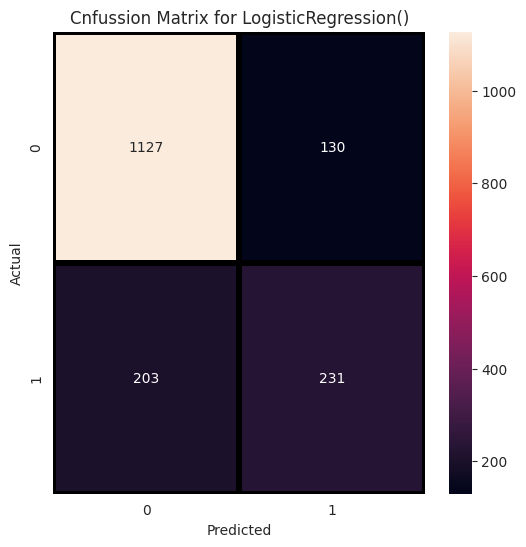

ROC AUC score = 0.8391661075855393
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

DecisionTreeClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1257
           1       0.46      0.48      0.47       434

    accuracy                           0.72      1691
   macro avg       0.64      0.64      0.64      1691
weighted avg       0.73      0.72      0.72      1691



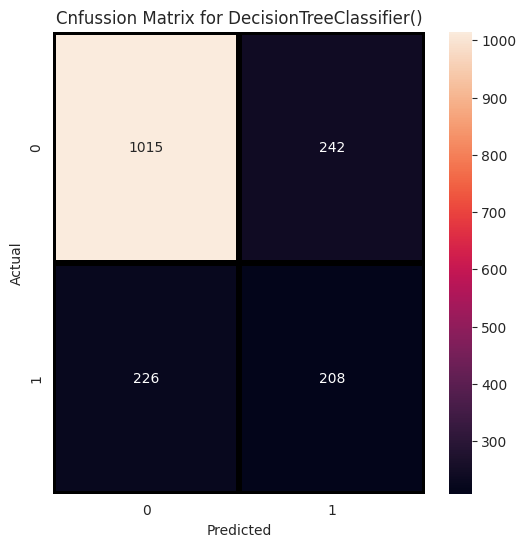

ROC AUC score = 0.6433703976624909
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

RandomForestClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1257
           1       0.61      0.46      0.53       434

    accuracy                           0.79      1691
   macro avg       0.72      0.68      0.69      1691
weighted avg       0.77      0.79      0.78      1691



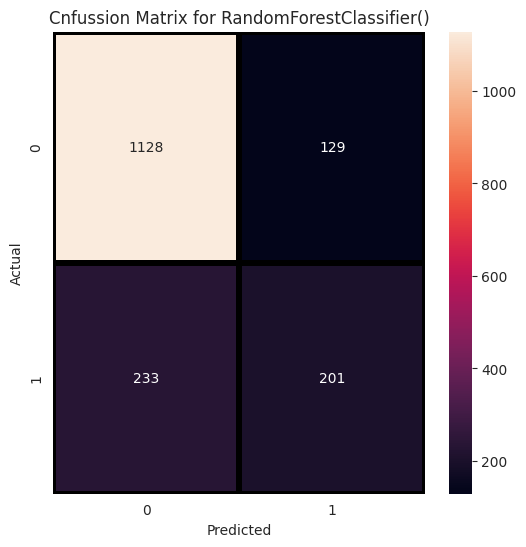

ROC AUC score = 0.8207081816482078
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GaussianNB()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1257
           1       0.51      0.74      0.61       434

    accuracy                           0.75      1691
   macro avg       0.70      0.75      0.71      1691
weighted avg       0.80      0.75      0.76      1691



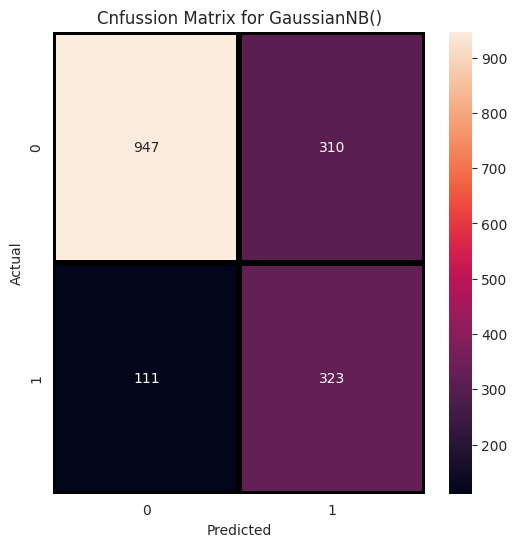

ROC AUC score = 0.8211746936052118
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

KNeighborsClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1257
           1       0.56      0.51      0.53       434

    accuracy                           0.77      1691
   macro avg       0.70      0.69      0.69      1691
weighted avg       0.77      0.77      0.77      1691



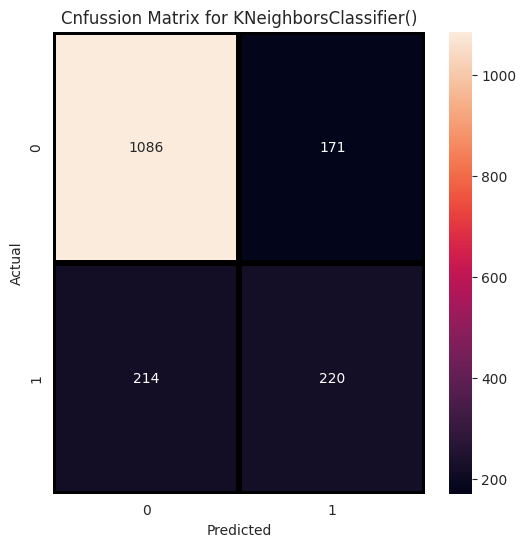

ROC AUC score = 0.7768331445288872
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

SVC(probability=True)
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1257
           1       0.67      0.46      0.55       434

    accuracy                           0.80      1691
   macro avg       0.75      0.69      0.71      1691
weighted avg       0.79      0.80      0.79      1691



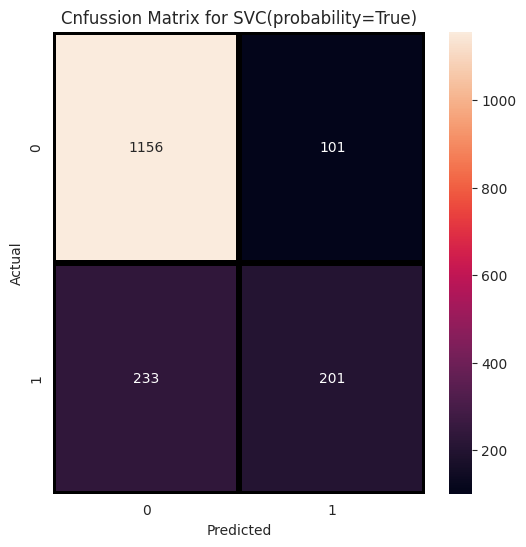

ROC AUC score = 0.7816980668624367
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

AdaBoostClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1257
           1       0.65      0.53      0.58       434

    accuracy                           0.80      1691
   macro avg       0.75      0.71      0.73      1691
weighted avg       0.80      0.80      0.80      1691



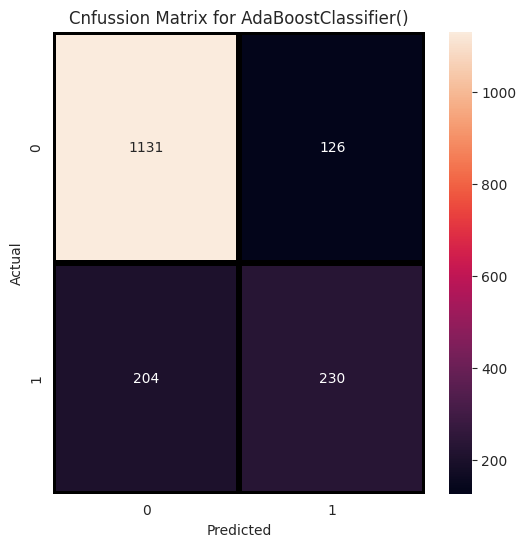

ROC AUC score = 0.836193812346711
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GradientBoostingClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1257
           1       0.65      0.50      0.56       434

    accuracy                           0.80      1691
   macro avg       0.74      0.70      0.72      1691
weighted avg       0.79      0.80      0.79      1691



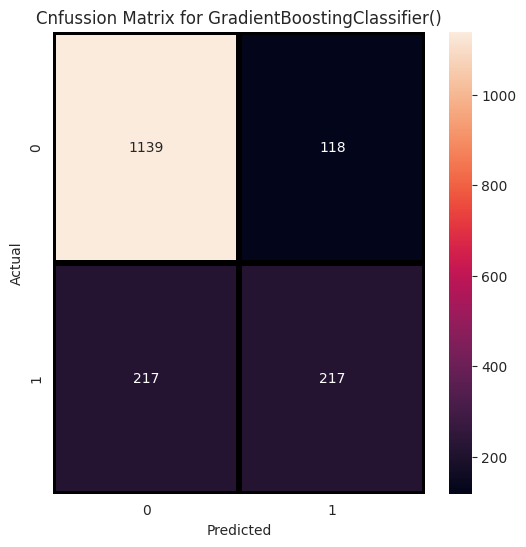

ROC AUC score = 0.8386904303641542
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Classification report for testing dat

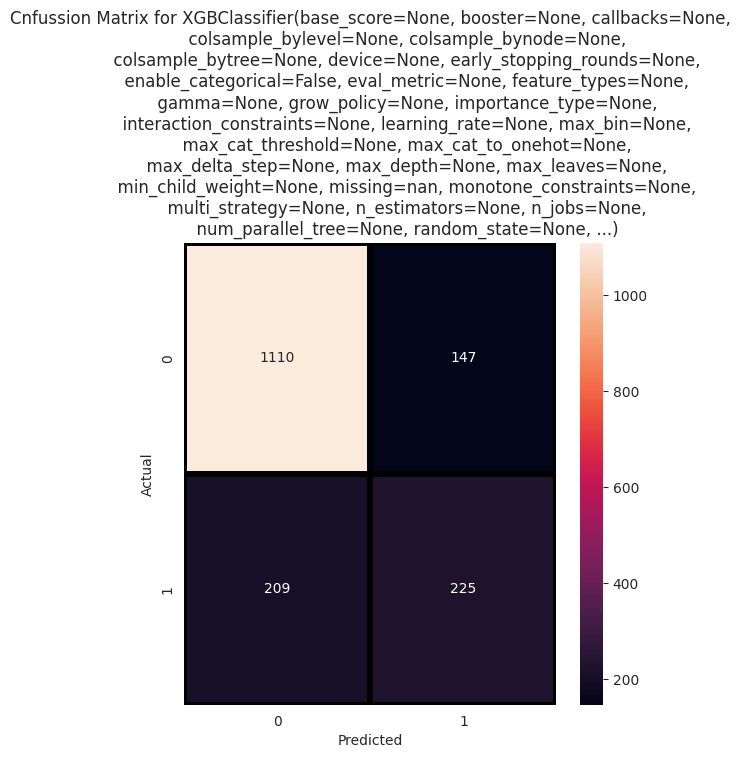

ROC AUC score = 0.8249947757993026
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Learning rate set to 0.021087
0:	learn: 0.6795621	total: 3.2ms	remaining: 3.19s
1:	learn: 0.6644747	total: 6.31ms	remaining: 3.15s
2:	learn: 0.6512342	total: 9.65ms	remaining: 3.21s
3:	learn: 0.6405999	total: 13ms	remaining: 3.23s
4:	learn: 0.6281499	total: 16.3ms	remaining: 3.24s
5:	learn: 0.6179353	total: 19.6ms	remaining: 3.24s
6:	learn: 0.6082074	total: 22.9ms	remaining: 3.25s
7:	learn: 0.5994542	total: 26.1ms	remaining: 3.24s
8:	learn: 0.5912379	total: 29.5ms	remaining: 3.24s
9:	learn: 0.5813121	total: 32.7ms	remaining: 3.23s
10:	learn: 0.5733961	total: 37.1ms	remaining: 3.34s
11:	learn: 0.5659416	total: 40.4ms	remaining: 3.32s
12:	learn: 0.5589132	total: 43.8ms	remaining: 3.33s
13:	learn: 0.5518011	total: 47.2ms	remaining: 3.32s
14:	learn: 0.5460593	total: 50.5ms	remaining: 3.32

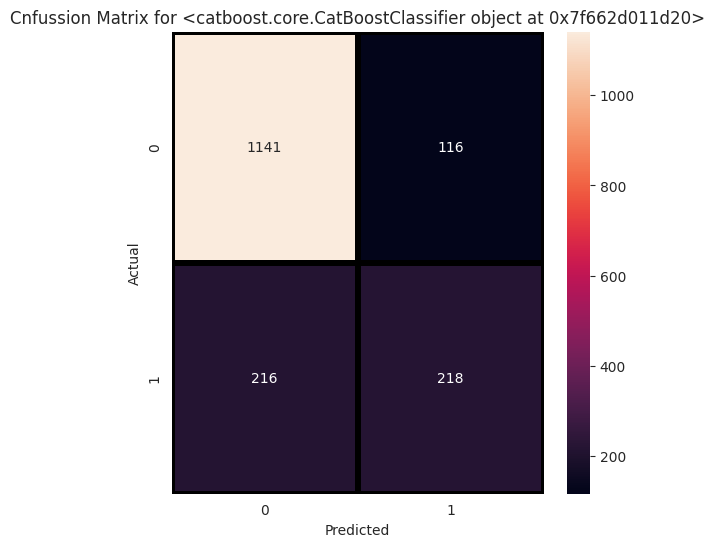

ROC AUC score = 0.8397206060806031
------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [681]:
# model train with imbalanced data
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), SVC(probability = True), AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier(), CatBoostClassifier()]


modelTraining(models, X_train, y_train, X_test, y_test)

LogisticRegression()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1257
           1       0.51      0.76      0.61       434

    accuracy                           0.75      1691
   macro avg       0.71      0.76      0.72      1691
weighted avg       0.80      0.75      0.77      1691



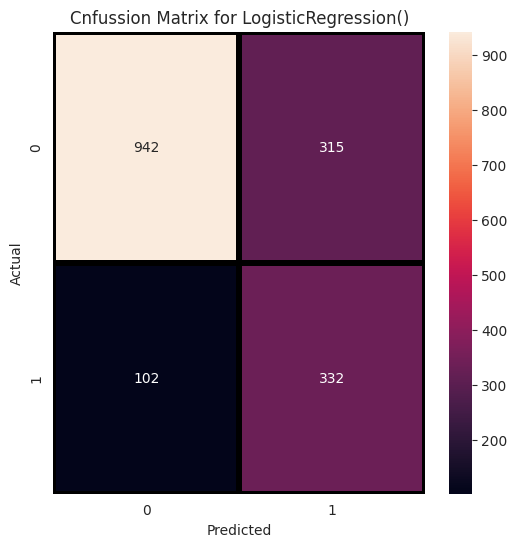

ROC AUC score = 0.8385300382374831
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

DecisionTreeClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1257
           1       0.47      0.49      0.48       434

    accuracy                           0.73      1691
   macro avg       0.64      0.65      0.65      1691
weighted avg       0.73      0.73      0.73      1691



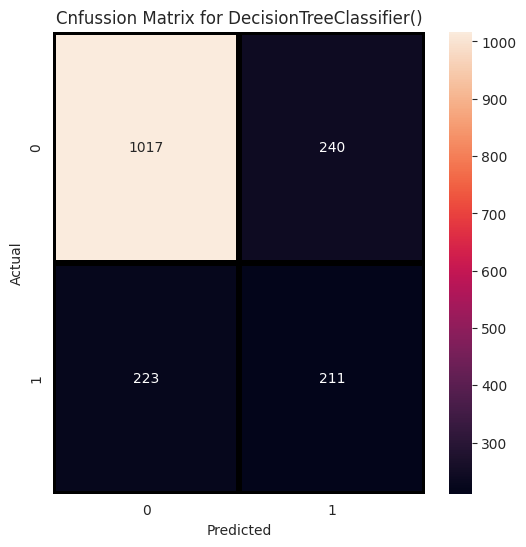

ROC AUC score = 0.6483095586375285
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

RandomForestClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1257
           1       0.59      0.53      0.56       434

    accuracy                           0.79      1691
   macro avg       0.72      0.70      0.71      1691
weighted avg       0.78      0.79      0.78      1691



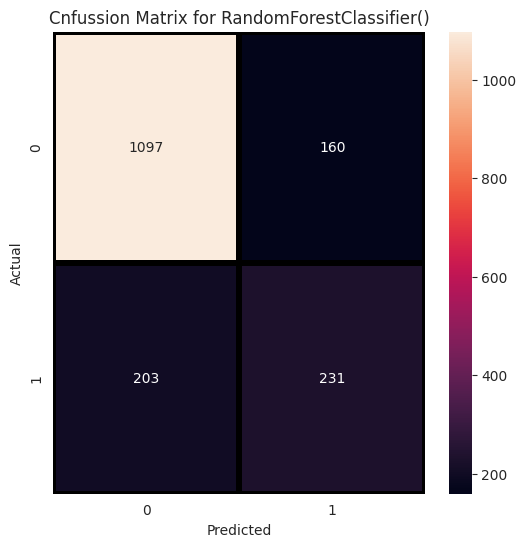

ROC AUC score = 0.823144308920735
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GaussianNB()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1257
           1       0.49      0.77      0.60       434

    accuracy                           0.73      1691
   macro avg       0.69      0.74      0.70      1691
weighted avg       0.79      0.73      0.75      1691



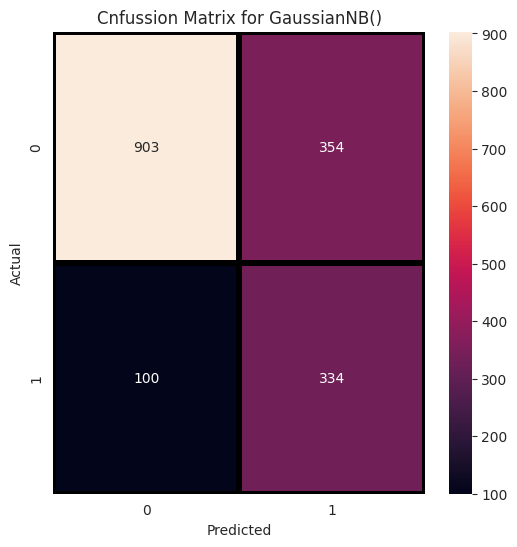

ROC AUC score = 0.8210390476923698
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

KNeighborsClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.86      0.70      0.78      1257
           1       0.44      0.68      0.53       434

    accuracy                           0.70      1691
   macro avg       0.65      0.69      0.65      1691
weighted avg       0.75      0.70      0.71      1691



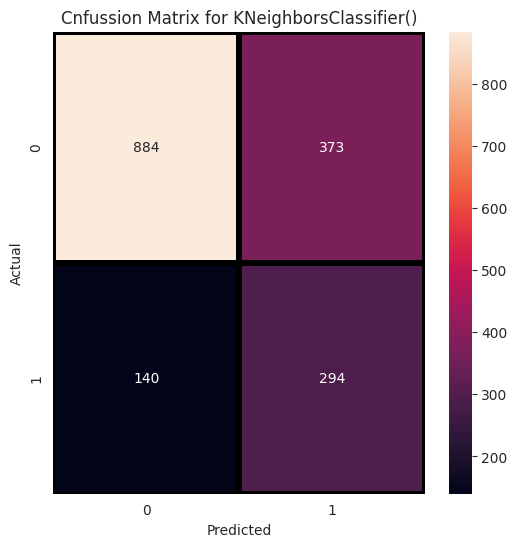

ROC AUC score = 0.7570022619872493
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

SVC(probability=True)
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1257
           1       0.51      0.75      0.61       434

    accuracy                           0.75      1691
   macro avg       0.70      0.75      0.71      1691
weighted avg       0.80      0.75      0.77      1691



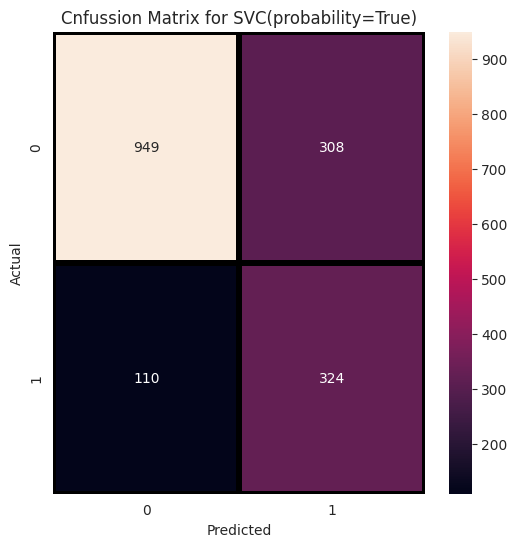

ROC AUC score = 0.8231122304954008
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

AdaBoostClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1257
           1       0.51      0.79      0.62       434

    accuracy                           0.75      1691
   macro avg       0.71      0.76      0.71      1691
weighted avg       0.81      0.75      0.76      1691



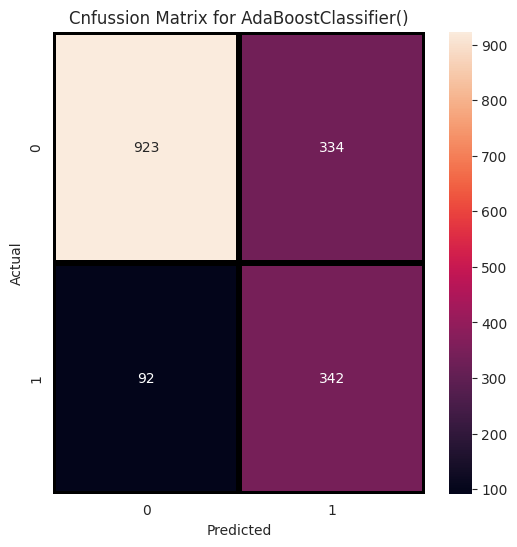

ROC AUC score = 0.8343332636773241
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GradientBoostingClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1257
           1       0.51      0.75      0.61       434

    accuracy                           0.75      1691
   macro avg       0.71      0.75      0.72      1691
weighted avg       0.80      0.75      0.77      1691



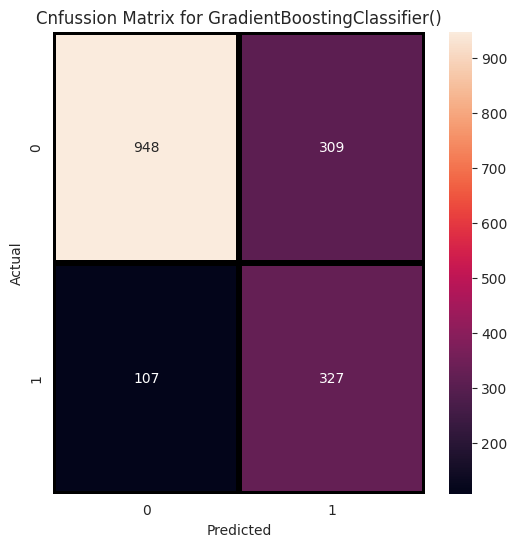

ROC AUC score = 0.8391459440039009
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Classification report for testing dat

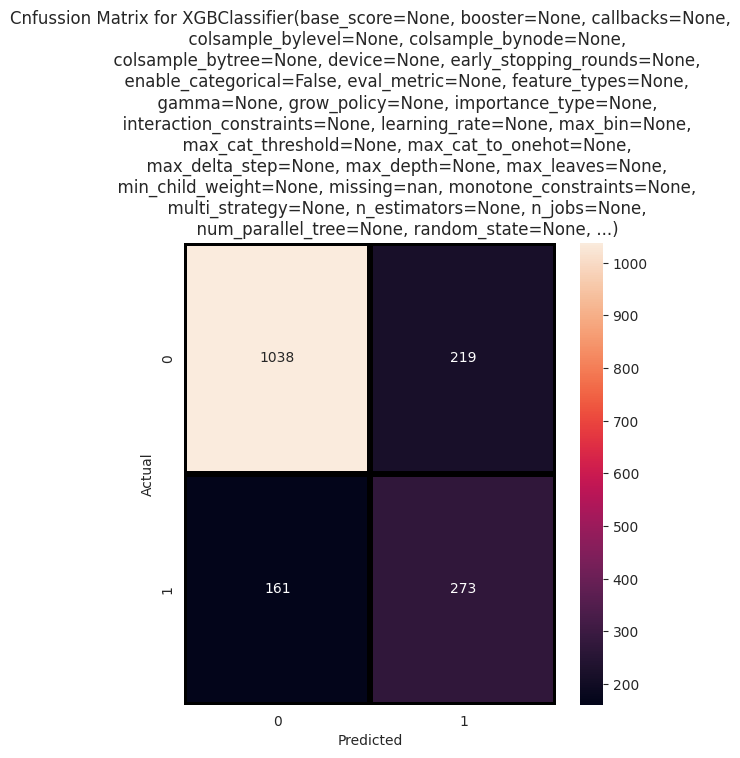

ROC AUC score = 0.8209272314669189
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Learning rate set to 0.024812
0:	learn: 0.6817933	total: 9.44ms	remaining: 9.43s
1:	learn: 0.6707922	total: 18.9ms	remaining: 9.45s
2:	learn: 0.6605607	total: 31.7ms	remaining: 10.5s
3:	learn: 0.6510468	total: 41.8ms	remaining: 10.4s
4:	learn: 0.6418394	total: 49ms	remaining: 9.76s
5:	learn: 0.6328054	total: 56.2ms	remaining: 9.31s
6:	learn: 0.6244037	total: 66.1ms	remaining: 9.37s
7:	learn: 0.6164062	total: 72ms	remaining: 8.93s
8:	learn: 0.6086117	total: 83.5ms	remaining: 9.19s
9:	learn: 0.6016537	total: 90.6ms	remaining: 8.96s
10:	learn: 0.5952846	total: 100ms	remaining: 9s
11:	learn: 0.5891588	total: 109ms	remaining: 8.96s
12:	learn: 0.5830569	total: 118ms	remaining: 8.98s
13:	learn: 0.5771130	total: 129ms	remaining: 9.07s
14:	learn: 0.5721507	total: 141ms	remaining: 9.24s
15:	lea

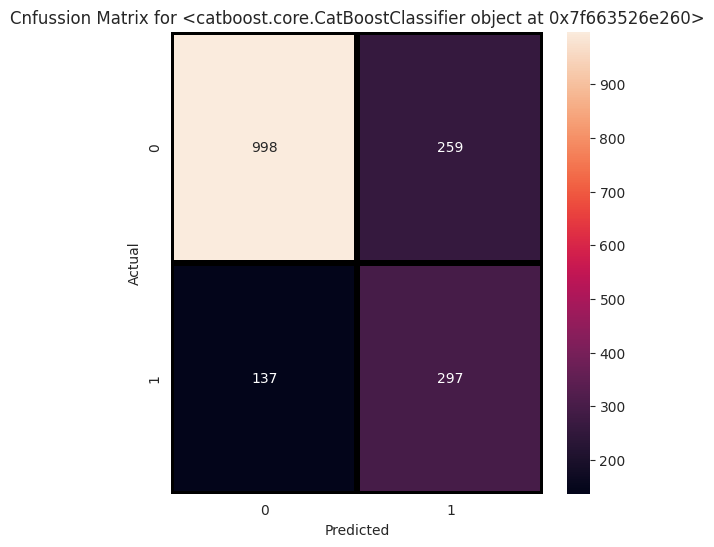

ROC AUC score = 0.837189160058511
------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [676]:
# model train with RandomOverSampler balanced data
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), SVC(probability = True), AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier(), CatBoostClassifier()]


modelTraining(models, X_train_ros, y_train_ros, X_test, y_test)

LogisticRegression()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1257
           1       0.51      0.74      0.60       434

    accuracy                           0.75      1691
   macro avg       0.70      0.74      0.71      1691
weighted avg       0.79      0.75      0.76      1691



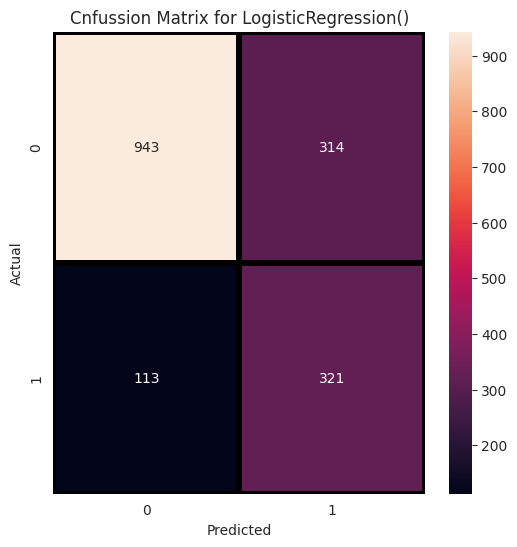

ROC AUC score = 0.8239279390253291
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

DecisionTreeClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1257
           1       0.46      0.55      0.50       434

    accuracy                           0.72      1691
   macro avg       0.65      0.66      0.65      1691
weighted avg       0.74      0.72      0.73      1691



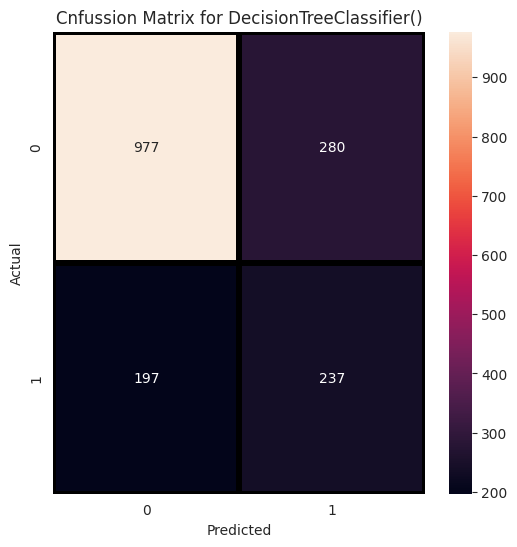

ROC AUC score = 0.661484626185527
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

RandomForestClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1257
           1       0.55      0.62      0.58       434

    accuracy                           0.77      1691
   macro avg       0.71      0.72      0.71      1691
weighted avg       0.78      0.77      0.78      1691



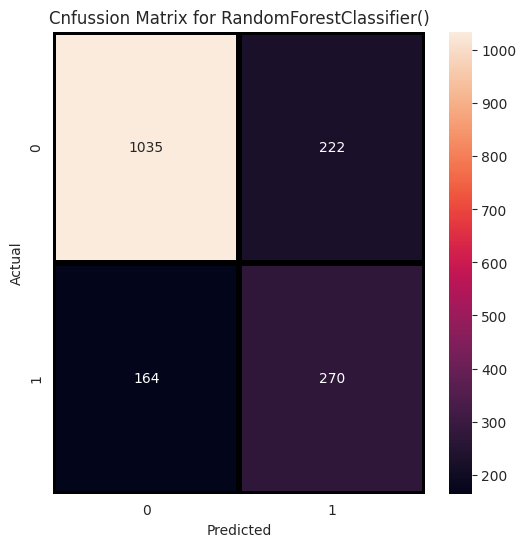

ROC AUC score = 0.816926593564518
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GaussianNB()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1257
           1       0.49      0.77      0.60       434

    accuracy                           0.73      1691
   macro avg       0.69      0.75      0.70      1691
weighted avg       0.80      0.73      0.75      1691



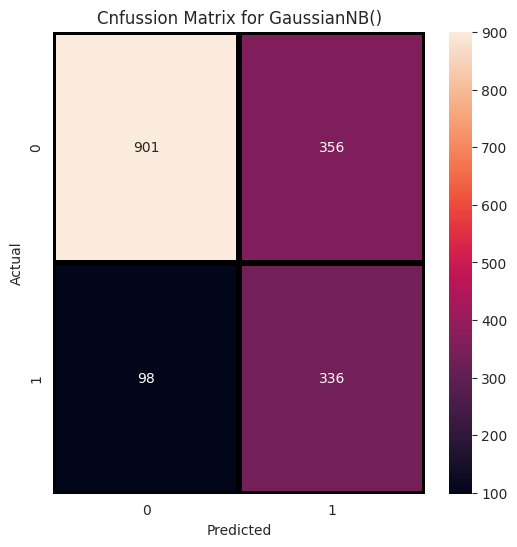

ROC AUC score = 0.8187239019096745
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

KNeighborsClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      1257
           1       0.45      0.74      0.55       434

    accuracy                           0.70      1691
   macro avg       0.66      0.71      0.66      1691
weighted avg       0.77      0.70      0.72      1691



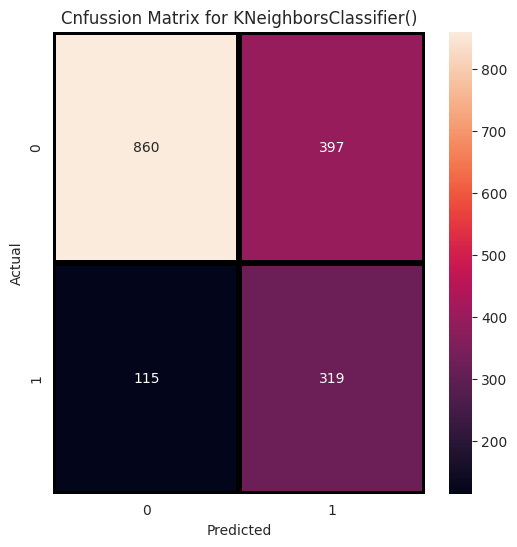

ROC AUC score = 0.7744565914748377
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

SVC(probability=True)
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1257
           1       0.49      0.76      0.60       434

    accuracy                           0.74      1691
   macro avg       0.70      0.74      0.70      1691
weighted avg       0.79      0.74      0.75      1691



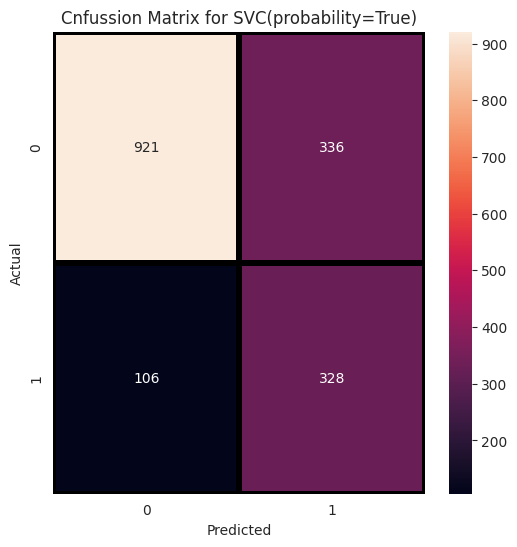

ROC AUC score = 0.8160659752391217
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

AdaBoostClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1257
           1       0.49      0.79      0.61       434

    accuracy                           0.73      1691
   macro avg       0.70      0.75      0.70      1691
weighted avg       0.80      0.73      0.75      1691



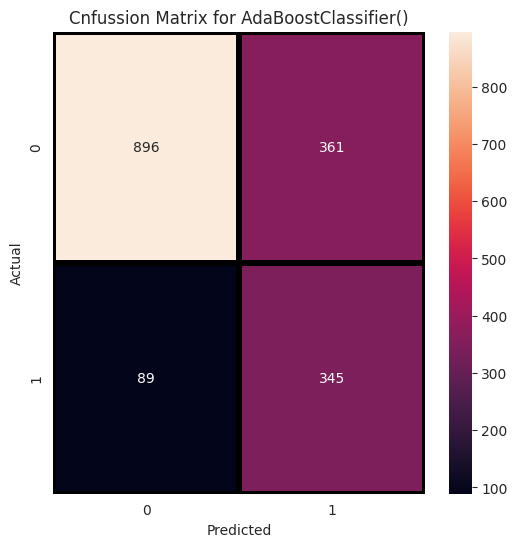

ROC AUC score = 0.8302070616529005
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GradientBoostingClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1257
           1       0.51      0.76      0.61       434

    accuracy                           0.75      1691
   macro avg       0.70      0.75      0.71      1691
weighted avg       0.80      0.75      0.76      1691



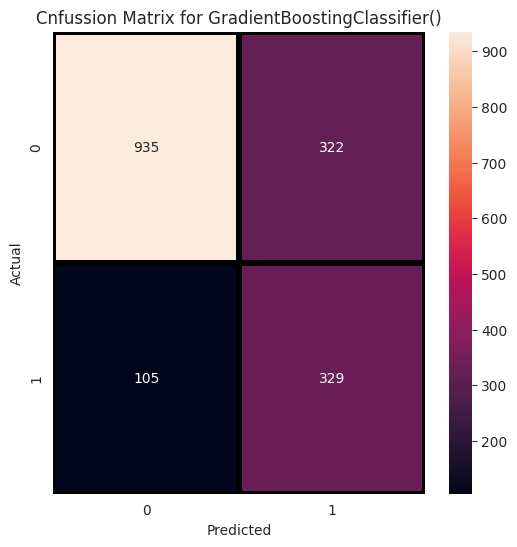

ROC AUC score = 0.8368977046511883
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Classification report for testing dat

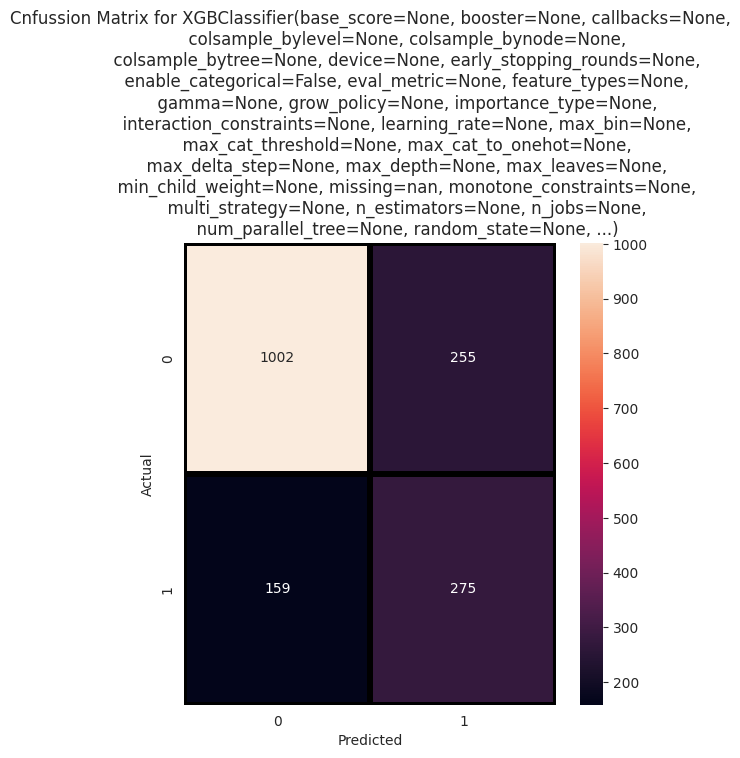

ROC AUC score = 0.8089482309206693
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Learning rate set to 0.024804
0:	learn: 0.6816828	total: 3.98ms	remaining: 3.98s
1:	learn: 0.6718549	total: 7.98ms	remaining: 3.98s
2:	learn: 0.6615803	total: 12ms	remaining: 4s
3:	learn: 0.6523230	total: 16.1ms	remaining: 4s
4:	learn: 0.6432681	total: 20.4ms	remaining: 4.05s
5:	learn: 0.6349405	total: 24.5ms	remaining: 4.05s
6:	learn: 0.6269549	total: 28.5ms	remaining: 4.04s
7:	learn: 0.6191749	total: 32.9ms	remaining: 4.08s
8:	learn: 0.6124137	total: 36.9ms	remaining: 4.06s
9:	learn: 0.6057820	total: 40.8ms	remaining: 4.04s
10:	learn: 0.5997477	total: 44.8ms	remaining: 4.03s
11:	learn: 0.5939068	total: 48.9ms	remaining: 4.02s
12:	learn: 0.5886410	total: 52.9ms	remaining: 4.02s
13:	learn: 0.5840453	total: 56.8ms	remaining: 4s
14:	learn: 0.5799771	total: 61ms	remaining: 4s
15:	learn: 

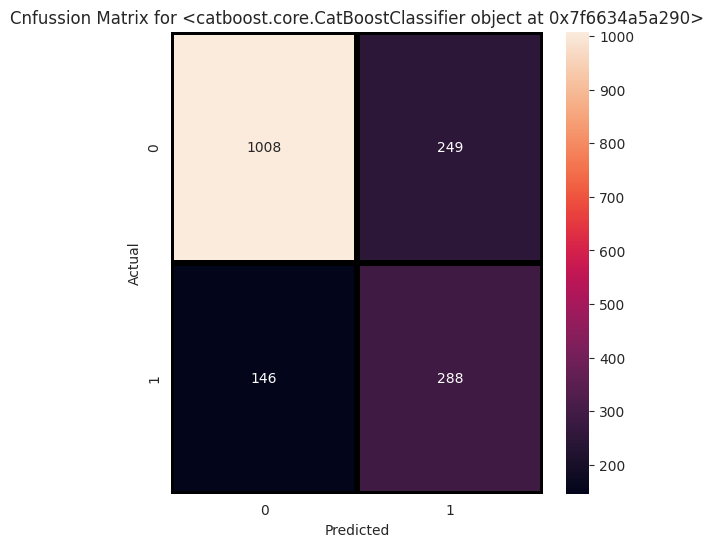

ROC AUC score = 0.826677518339694
------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [677]:
# model train with ADASYN balanced data
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), SVC(probability = True), AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier(), CatBoostClassifier()]


modelTraining(models, X_train_ad, y_train_ad, X_test, y_test)

LogisticRegression()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1257
           1       0.53      0.72      0.61       434

    accuracy                           0.76      1691
   macro avg       0.71      0.75      0.72      1691
weighted avg       0.80      0.76      0.77      1691



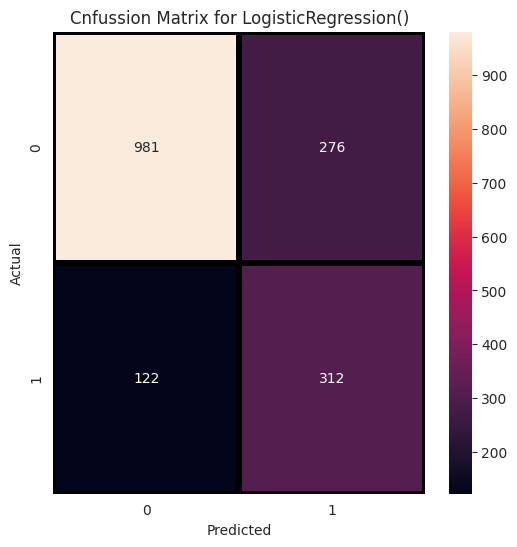

ROC AUC score = 0.8302996308231506
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

DecisionTreeClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1257
           1       0.48      0.59      0.53       434

    accuracy                           0.73      1691
   macro avg       0.66      0.68      0.67      1691
weighted avg       0.75      0.73      0.74      1691



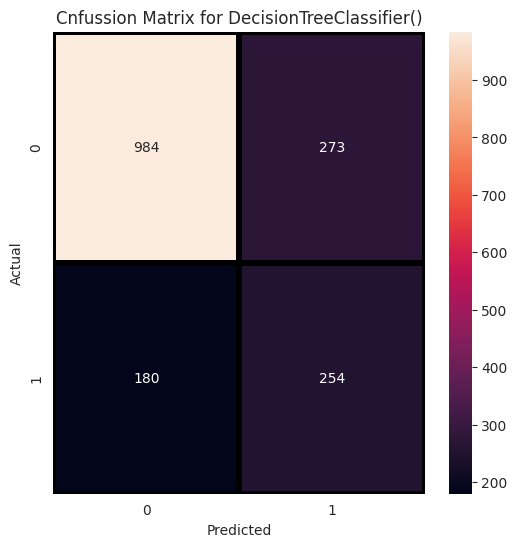

ROC AUC score = 0.6847717299253214
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

RandomForestClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1257
           1       0.55      0.59      0.57       434

    accuracy                           0.77      1691
   macro avg       0.70      0.71      0.71      1691
weighted avg       0.78      0.77      0.77      1691



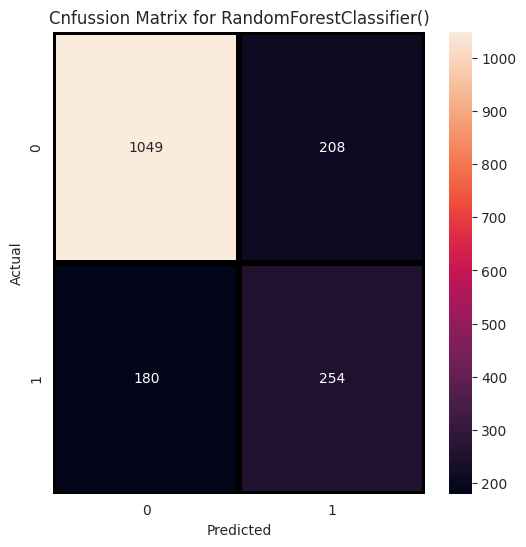

ROC AUC score = 0.8159477433286041
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GaussianNB()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1257
           1       0.51      0.75      0.61       434

    accuracy                           0.75      1691
   macro avg       0.70      0.75      0.71      1691
weighted avg       0.80      0.75      0.77      1691



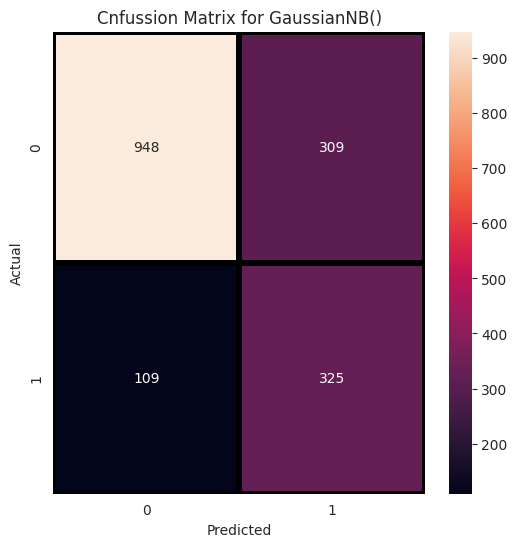

ROC AUC score = 0.8185149338817828
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

KNeighborsClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1257
           1       0.46      0.68      0.55       434

    accuracy                           0.71      1691
   macro avg       0.66      0.70      0.67      1691
weighted avg       0.76      0.71      0.73      1691



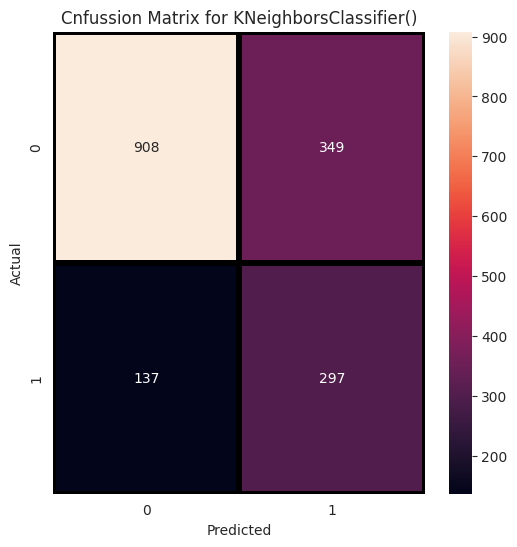

ROC AUC score = 0.7756728220582252
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

SVC(probability=True)
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1257
           1       0.54      0.73      0.62       434

    accuracy                           0.77      1691
   macro avg       0.72      0.76      0.73      1691
weighted avg       0.80      0.77      0.78      1691



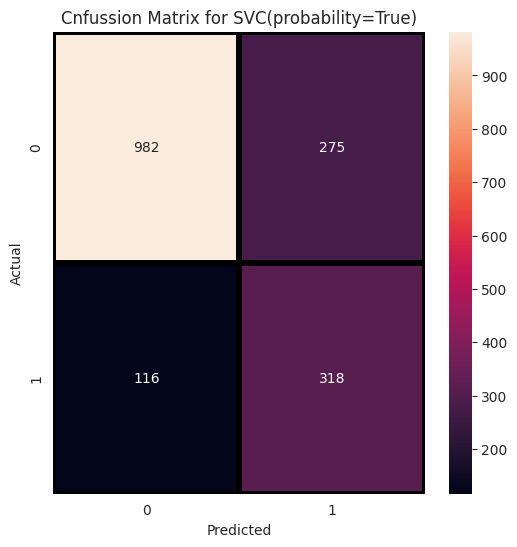

ROC AUC score = 0.8191262570160099
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

AdaBoostClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1257
           1       0.50      0.77      0.61       434

    accuracy                           0.75      1691
   macro avg       0.70      0.75      0.71      1691
weighted avg       0.80      0.75      0.76      1691



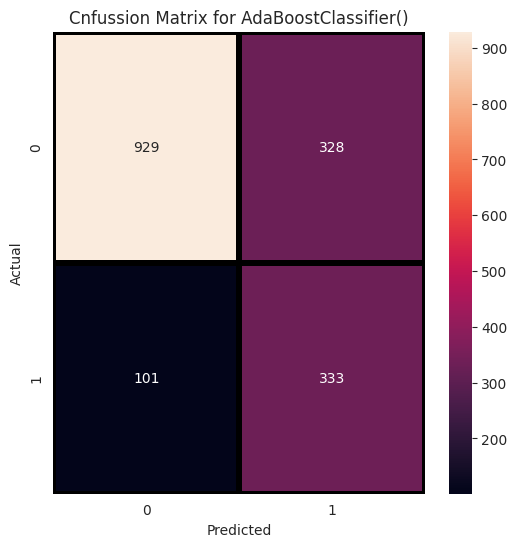

ROC AUC score = 0.8350014114507146
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GradientBoostingClassifier()
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1257
           1       0.52      0.72      0.61       434

    accuracy                           0.76      1691
   macro avg       0.71      0.75      0.72      1691
weighted avg       0.80      0.76      0.77      1691



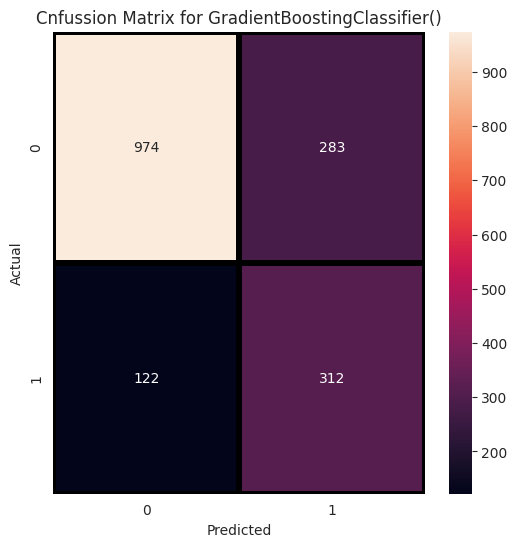

ROC AUC score = 0.8380745245977365
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Classification report for testing dat

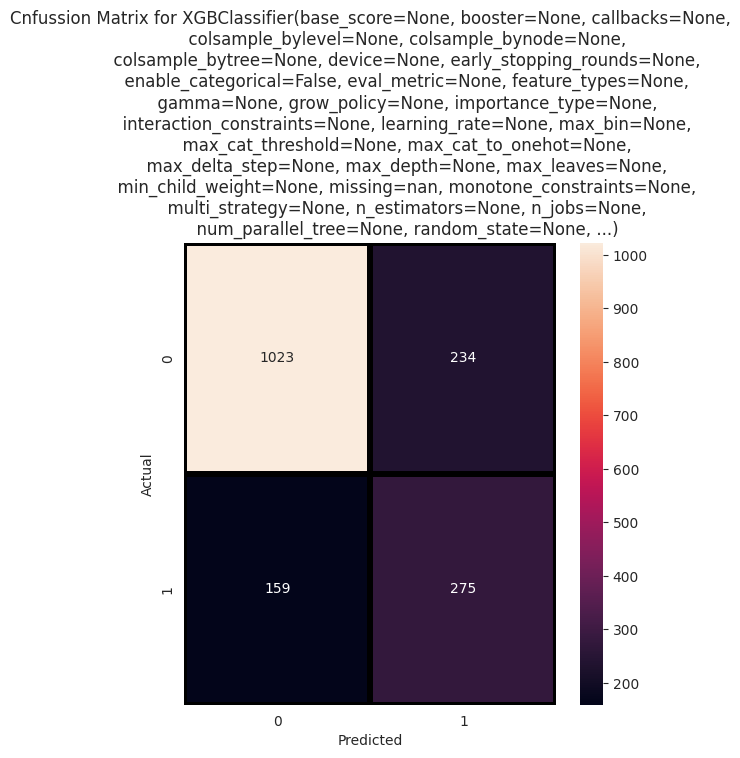

ROC AUC score = 0.8113412814506047
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Learning rate set to 0.024812
0:	learn: 0.6806692	total: 3.56ms	remaining: 3.56s
1:	learn: 0.6684952	total: 7.58ms	remaining: 3.78s
2:	learn: 0.6563027	total: 11.6ms	remaining: 3.85s
3:	learn: 0.6445389	total: 15.6ms	remaining: 3.9s
4:	learn: 0.6341995	total: 19.7ms	remaining: 3.93s
5:	learn: 0.6246147	total: 24ms	remaining: 3.97s
6:	learn: 0.6162026	total: 27.9ms	remaining: 3.96s
7:	learn: 0.6074674	total: 31.9ms	remaining: 3.96s
8:	learn: 0.5989467	total: 36ms	remaining: 3.96s
9:	learn: 0.5914099	total: 40.1ms	remaining: 3.97s
10:	learn: 0.5855973	total: 44.1ms	remaining: 3.96s
11:	learn: 0.5785709	total: 48.1ms	remaining: 3.96s
12:	learn: 0.5727913	total: 52ms	remaining: 3.95s
13:	learn: 0.5676537	total: 56.4ms	remaining: 3.97s
14:	learn: 0.5617398	total: 60.7ms	remaining: 3.99s
15

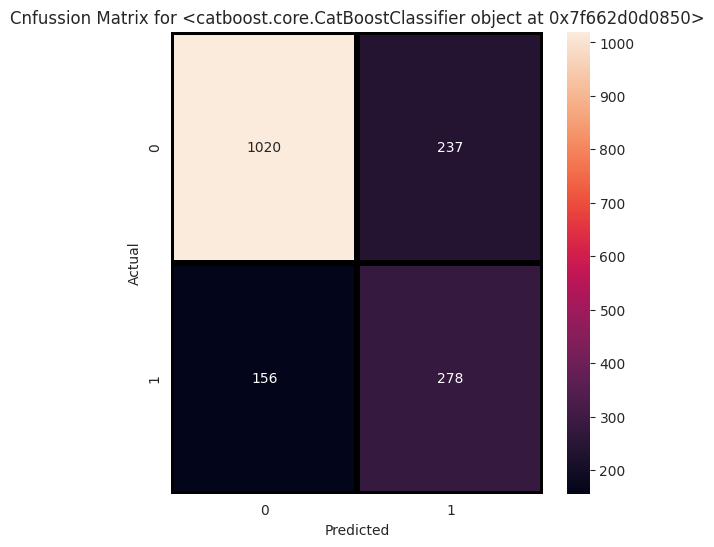

ROC AUC score = 0.8299018583490059
------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [678]:
# model train with SMOTE balanced data
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), SVC(probability = True), AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier(), CatBoostClassifier()]


modelTraining(models, X_train_sm, y_train_sm, X_test, y_test)

CatBoost demonstrates low Type 1 and Type 2 errors, making it a favorable estimator. Let's proceed with tuning its hyperparameters for optimal performance

# **HYPERPARAMETER TUNING FOR CATBOOST**


In [692]:
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128],
    'cat_features': [[0, 1, 3, 5], [2, 4, 6]],
    'auto_class_weights': ['None', 'Balanced']
}

model= CatBoostClassifier()
gridsearch = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')

gridsearch.fit(X_train_sm, y_train_sm)

Streaming output truncated to the last 5000 lines.
456:	learn: 0.1710867	total: 1.62s	remaining: 1.93s
457:	learn: 0.1709159	total: 1.63s	remaining: 1.93s
458:	learn: 0.1706792	total: 1.63s	remaining: 1.92s
459:	learn: 0.1704395	total: 1.63s	remaining: 1.92s
460:	learn: 0.1702209	total: 1.64s	remaining: 1.91s
461:	learn: 0.1699595	total: 1.64s	remaining: 1.91s
462:	learn: 0.1697611	total: 1.64s	remaining: 1.91s
463:	learn: 0.1694272	total: 1.65s	remaining: 1.9s
464:	learn: 0.1691805	total: 1.65s	remaining: 1.9s
465:	learn: 0.1689964	total: 1.65s	remaining: 1.89s
466:	learn: 0.1686834	total: 1.66s	remaining: 1.89s
467:	learn: 0.1684101	total: 1.66s	remaining: 1.89s
468:	learn: 0.1681771	total: 1.66s	remaining: 1.88s
469:	learn: 0.1679497	total: 1.67s	remaining: 1.88s
470:	learn: 0.1677763	total: 1.67s	remaining: 1.87s
471:	learn: 0.1675429	total: 1.67s	remaining: 1.87s
472:	learn: 0.1672900	total: 1.68s	remaining: 1.87s
473:	learn: 0.1670986	total: 1.68s	remaining: 1.86s
474:	learn: 0.1

KeyboardInterrupt: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f6634ea3460>,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200],
                         'learning_rate': [0.001, 0.01, 0.1]},
             scoring='roc_auc')
Classification report for testing data : 
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1257
           1       0.55      0.63      0.59       434

    accuracy                           0.77      1691
   macro avg       0.71      0.73      0.72      1691
weighted avg       0.79      0.77      0.78      1691



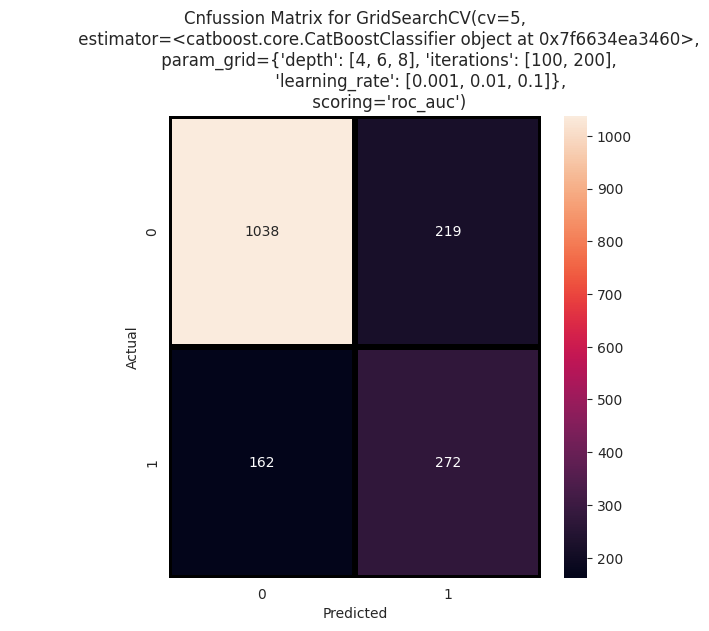

ROC AUC score = 0.8263420696633414
------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [691]:
eveluating(gridsearch, X_test, y_test)